In [1]:
# Import necessary classes
from utils.graphics.Image import Image
from utils.graphics.Point import Point
from digitization.Preprocessorv2 import Preprocessor 

In [2]:
import copy
import io
from os.path import splitext
from typing import Iterable, Sequence, Tuple
import cv2 as cv
import numpy as np
from pdf2image import convert_from_path
from pdf2image.exceptions import PDFPageCountError
from utils.graphics.ColorSpace import ColorSpace
from utils.graphics.Point import Point
from utils.graphics.Rectangle import Rectangle

class CustomImage:
    """
    A class that combines the functionalities of the original CustomImage and Image classes.
    """

    def __init__(self, array: np.ndarray = None, path: str = None) -> None:
        """
        Initialization of the image, either from an array or from a path.

        Args:
            array (np.ndarray): Numpy array containing the image data.
            path (str): Path to the image file.

        Raises:
            TypeError: If array is not a numpy array.
            FileNotFoundError: If the file does not exist.
        """
        self.__color_space = ColorSpace.BGR
        self.__data = None

        if array is not None:
            if isinstance(array, np.ndarray):
                self.__data = array
            else:
                raise TypeError("Expected a numpy.ndarray object")
        elif path is not None:
            _, file_extension = splitext(path)
            pdf_except = False
            if file_extension == ".pdf":
                try:
                    buffer = io.BytesIO()
                    pdf = convert_from_path(path)
                    pdf[0].save(buffer, format="png")
                    buffer.seek(0)
                    img_arr = np.frombuffer(buffer.getvalue(), dtype=np.uint8)
                    buffer.close()
                    self.__data = cv.imdecode(img_arr, cv.IMREAD_COLOR)
                except PDFPageCountError:
                    pdf_except = True
            else:
                self.__data = cv.imread(path)
            if self.__data is None or pdf_except:
                raise FileNotFoundError(f'File "{path}" does not exist')
        else:
            raise ValueError("Either array or path must be provided")

    def __getitem__(self, index: Sequence) -> Iterable[Iterable[int | Iterable[int]]]:
        return self.__data[index]

    def __setitem__(self, index: Sequence, value: Iterable[Iterable[int | Iterable[int]]]) -> None:
        self.__data[index] = value

    @property
    def data(self) -> Iterable[Iterable[int | Iterable[int]]]:
        return self.__data

    @data.setter
    def data(self, data: Iterable[Iterable[int | Iterable[int]]]) -> None:
        self.__data = data

    @property
    def height(self) -> int:
        return self.__data.shape[0]

    @property
    def width(self) -> int:
        return self.__data.shape[1]

    @property
    def white(self) -> int | Tuple[int, int, int]:
        if self.__color_space == ColorSpace.GRAY:
            return 255
        if self.__color_space == ColorSpace.HSV:
            return [0, 0, 255]
        return [255, 255, 255]

    @property
    def black(self) -> int | Tuple[int, int, int]:
        if self.__color_space == ColorSpace.GRAY:
            return 0
        return [0, 0, 0]
    

    @property
    def array(self):
        return self.data  # Assuming self.data is your image's numpy array.

    def copy(self) -> 'CustomImage':
        return copy.deepcopy(self)

    def save(self, path: str) -> None:
        self.to_BGR()
        cv.imwrite(path, self.__data)

    def crop(self, r: Rectangle) -> None:
        tl = r.top_left
        br = r.bottom_right
        self.__data = self.__data[tl.y : br.y, tl.x : br.x]

    def threshold(self, thres: int, value: int) -> None:
        _, self.__data = cv.threshold(self.__data, thres, value, cv.THRESH_BINARY)
        self.to_GRAY()

    def line(self, p1: Point, p2: Point, color: Tuple[int, int, int], thickness: int):
        cv.line(self.__data, (p1.x, p1.y), (p2.x, p2.y), color, thickness=thickness)

    def is_GRAY(self) -> bool:
        return self.__color_space == ColorSpace.GRAY

    def is_BGR(self) -> bool:
        return self.__color_space == ColorSpace.BGR

    def is_RGB(self) -> bool:
        return self.__color_space == ColorSpace.RGB

    def is_HSV(self) -> bool:
        return self.__color_space == ColorSpace.HSV

    def to_GRAY(self) -> None:
        if self.is_RGB():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_RGB2GRAY)
        elif self.is_BGR():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_BGR2GRAY)
        elif self.is_HSV():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_HSV2GRAY)
        self.__color_space = ColorSpace.GRAY

    def to_BGR(self) -> None:
        if self.is_GRAY():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_GRAY2BGR)
        elif self.is_RGB():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_RGB2BGR)
        elif self.is_HSV():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_HSV2BGR)
        self.__color_space = ColorSpace.BGR

    def to_RGB(self) -> None:
        if self.is_GRAY():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_GRAY2RGB)
        elif self.is_BGR():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_BGR2RGB)
        elif self.is_HSV():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_HSV2RGB)
        self.__color_space = ColorSpace.RGB

    def to_HSV(self) -> None:
        if self.is_GRAY():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_GRAY2HSV)
        elif self.is_BGR():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_BGR2HSV)
        elif self.is_RGB():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_RGB2HSV)
        self.__color_space = ColorSpace.HSV


## Single file test: Smoothen and refine data

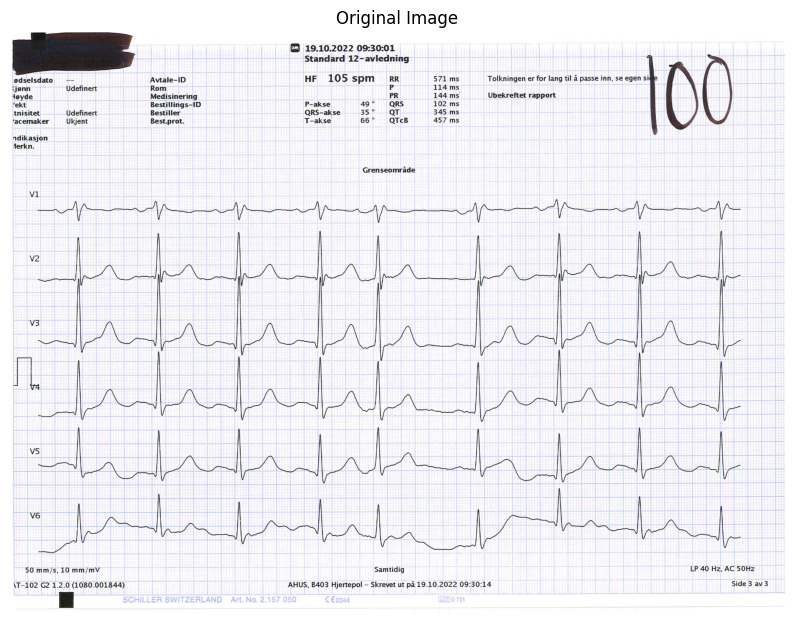

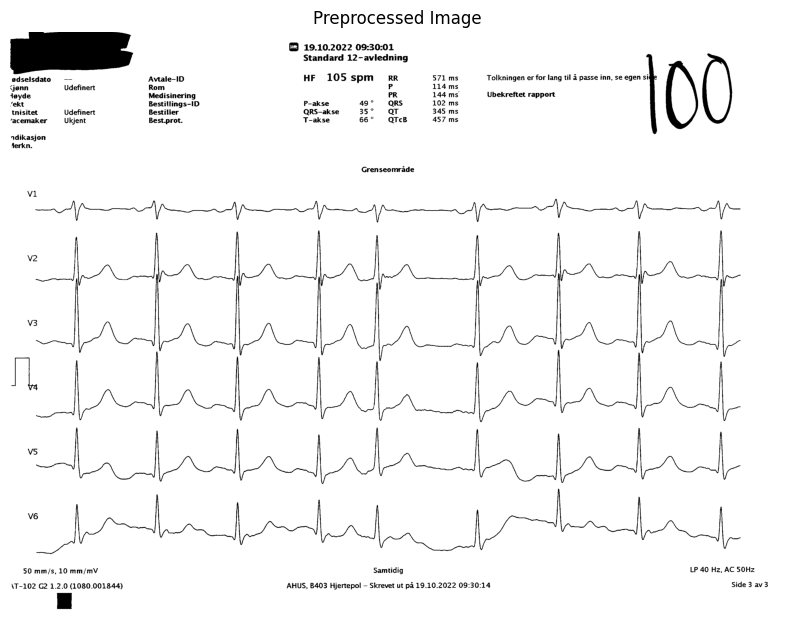

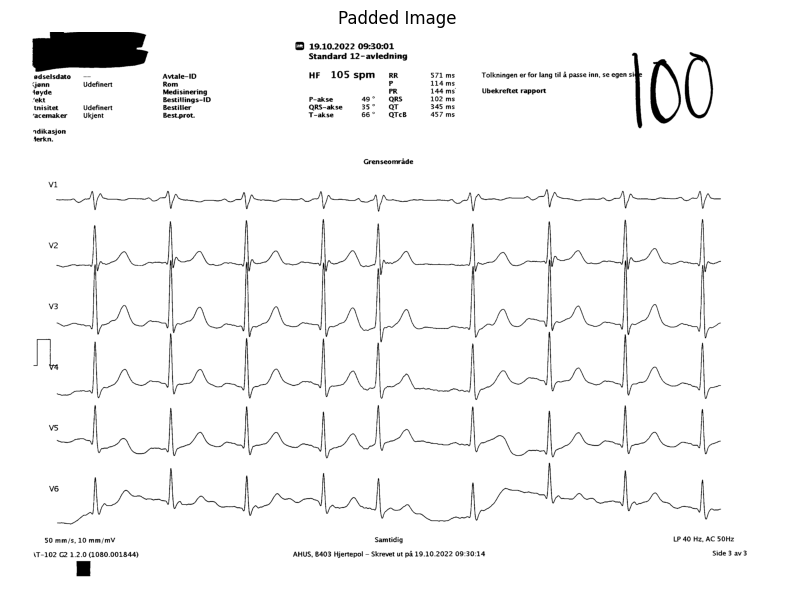

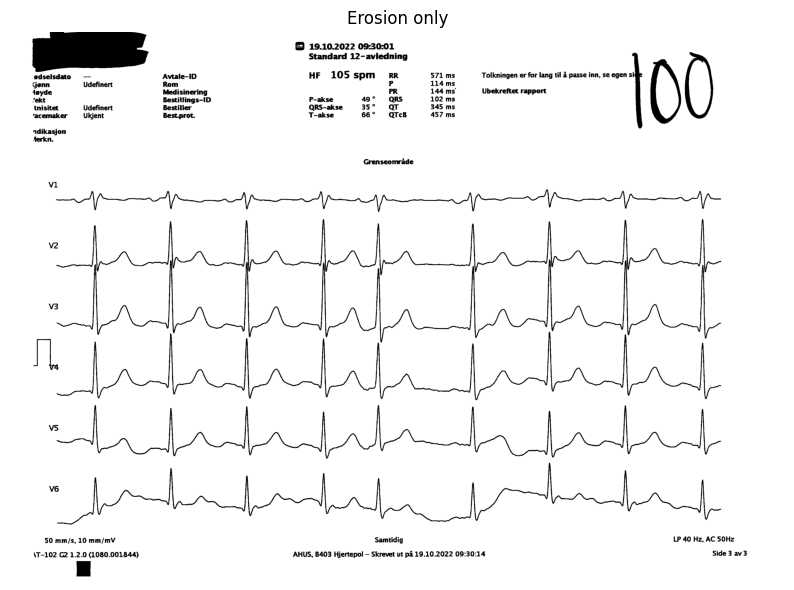

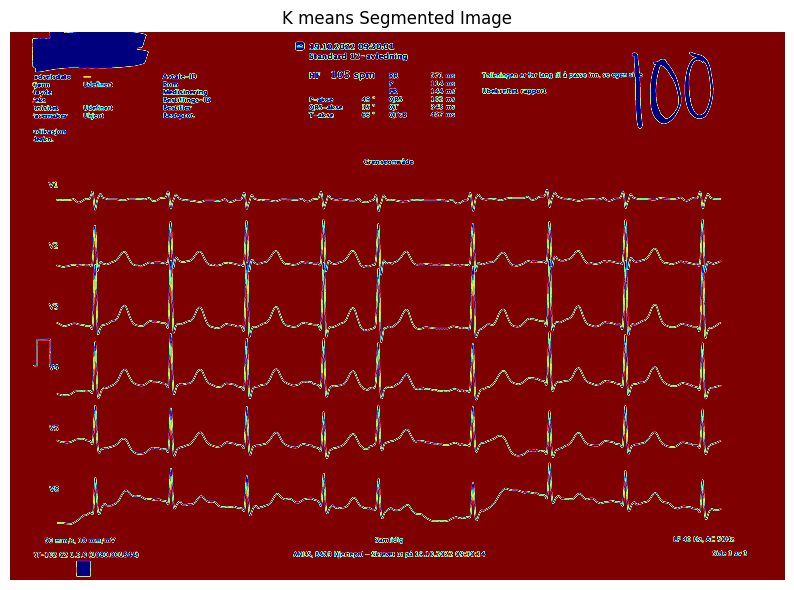

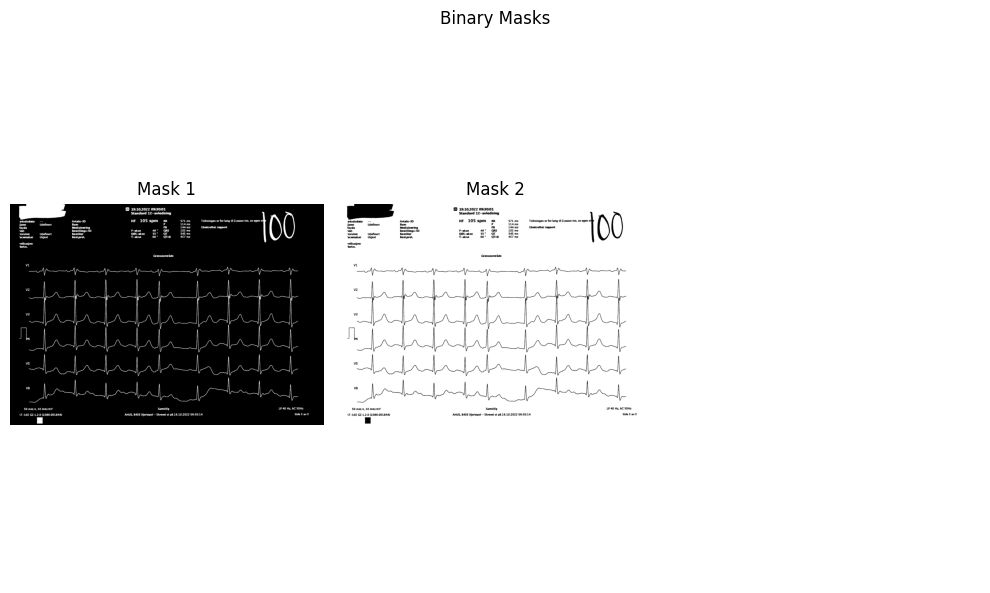

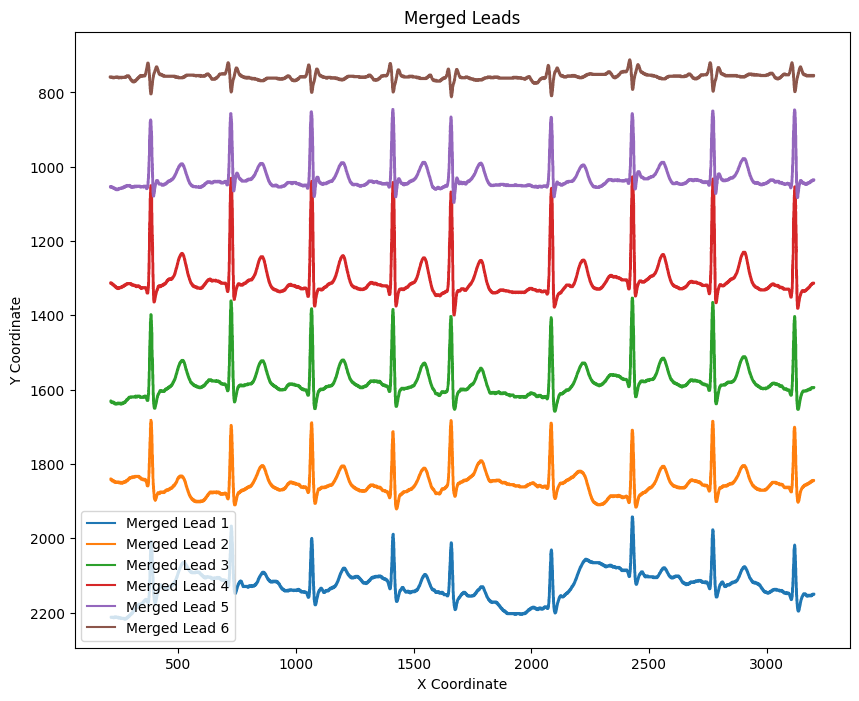

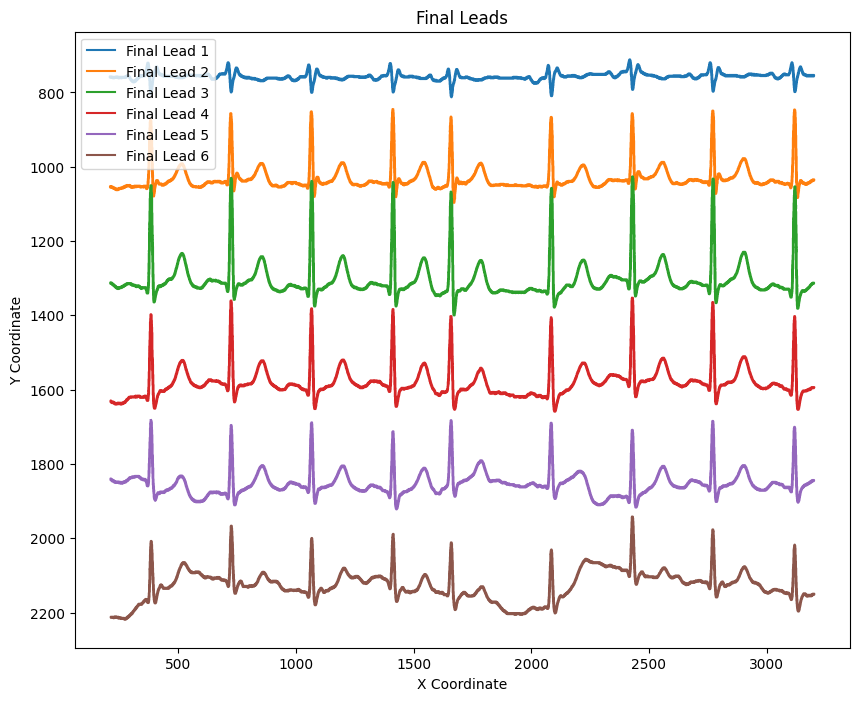

d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


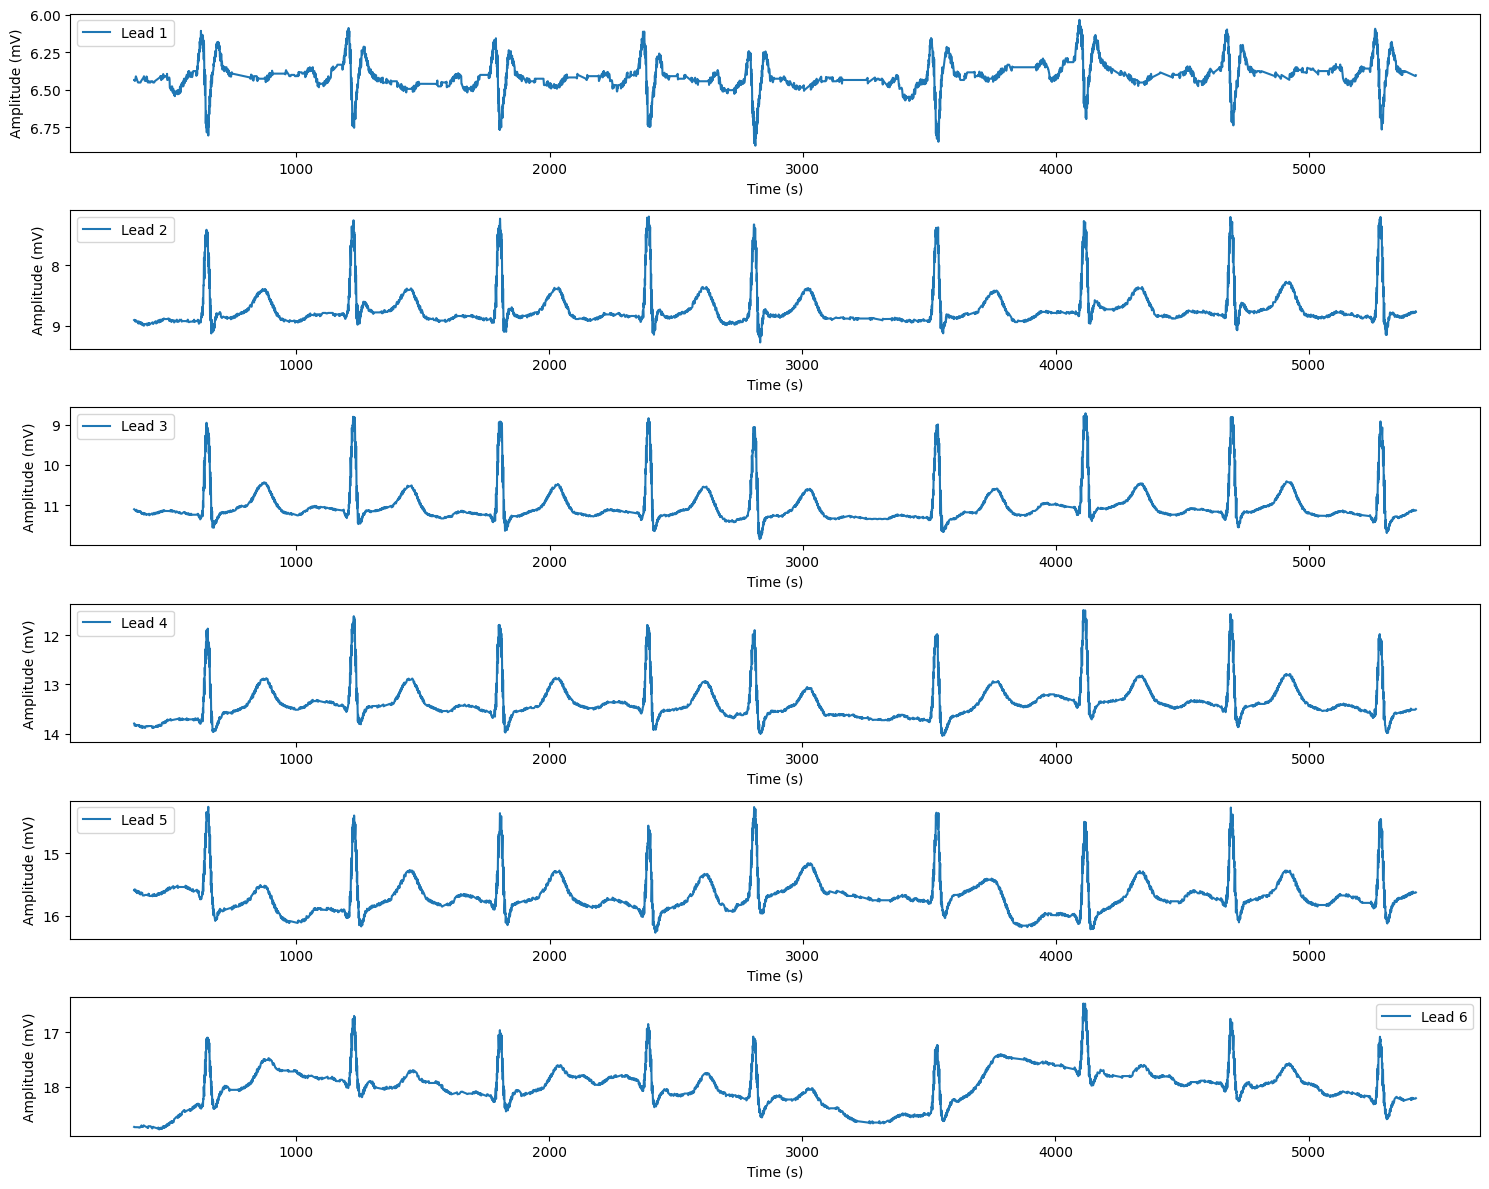

      Lead_1_time  Lead_1_amplitude  Lead_2_time  Lead_2_amplitude  \
0      359.017782          6.435224   359.017782          8.907705   
1      360.017782          6.435224   360.017782          8.912705   
2      361.017782          6.436757   361.017782          8.914640   
3      362.017782          6.441757   362.017782          8.909640   
4      363.017782          6.437561   363.017782          8.929314   
...           ...               ...          ...               ...   
5061  5420.017782          6.409173  5420.017782          8.789162   
5062  5421.017782          6.408882  5421.017782          8.785402   
5063  5422.017782          6.403882  5422.017782          8.765402   
5064  5423.017782               NaN  5423.017782          8.760237   
5065  5424.017782               NaN  5424.017782          8.770237   

      Lead_3_time  Lead_3_amplitude  Lead_4_time  Lead_4_amplitude  \
0      359.017782         11.100762   359.017782         13.793395   
1      360.017782  

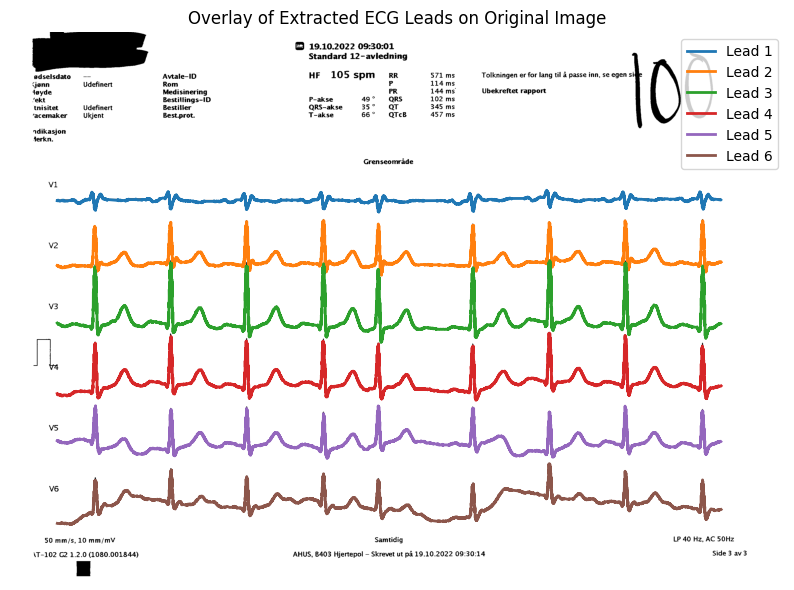

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
import sys
from scipy import ndimage  # Make sure to import ndimage for `find_objects`
from sklearn.linear_model import LinearRegression
from scipy.interpolate import CubicSpline

# Helper function to plot images
def plot_image(image, title, cmap='gray'):
    plt.figure(figsize=(10, 8))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

def plot_aligned_coordinates(aligned_coords):
    plt.figure(figsize=(10, 8))
    
    # Reverse the order of aligned leads to match top-to-bottom ordering
    for i, coords in enumerate(reversed(aligned_coords)):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Lead {i+1}')
    
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.title('Aligned ECG Signal Leads')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()


def apply_kmeans(image, n_clusters=2):
    Z = image.reshape((-1, 1))  # Flatten the image
    Z = np.float32(Z)
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv.kmeans(Z, n_clusters, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    segmented_image = labels.reshape((image.shape))
    return segmented_image, centers

def create_binary_masks(segmented_image, n_clusters):
    binary_masks = [(segmented_image == i).astype(np.uint8) * 255 for i in range(n_clusters)]
    return binary_masks

def extract_contour_coordinates(binary_masks):
    contour_coordinates = []
    for mask in binary_masks:
        contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            coords = contour[:, 0, :]  # Extract x and y coordinates
            contour_coordinates.append(coords)
    return contour_coordinates

def calculate_gradient(coords):
    # Fit a linear regression to the x and y coordinates to find the slope (gradient)
    X = coords[:, 0].reshape(-1, 1)  # x-coordinates
    y = coords[:, 1]  # y-coordinates
    model = LinearRegression().fit(X, y)
    slope = model.coef_[0]  # The gradient of the line (dy/dx)
    return slope

def filter_and_merge_leads(contour_coords, min_size=1000, y_threshold=30, gradient_threshold=0.05):
    # Filter out small contours
    large_contours = [coords for coords in contour_coords if len(coords) > min_size]

    merged_leads = []
    current_lead = []
    
    for i, coords in enumerate(large_contours):
        if not current_lead:
            current_lead.append(coords)
            continue

        # Calculate the gradient for the current contour and the first contour in the current lead
        current_gradient = calculate_gradient(coords)
        lead_gradient = calculate_gradient(current_lead[0])

        # Check if the y-values are similar and gradients are similar enough to merge
        if (np.abs(coords[:, 1].mean() - current_lead[0][:, 1].mean()) < y_threshold and
            np.abs(current_gradient - lead_gradient) < gradient_threshold):
            current_lead.append(coords)
        else:
            # Merge the current lead
            merged_leads.append(np.vstack(current_lead))
            current_lead = [coords]

    # Add the last lead
    if current_lead:
        merged_leads.append(np.vstack(current_lead))

    return merged_leads


def enforce_only_leads(merged_coords, max_leads=6):
    """
    This function selects 6 leads that have consistent x ranges, ensuring that
    6 leads are always selected.
    
    Args:
    merged_coords: List of np.array coordinates of the leads.
    max_leads: The number of leads to select (default is 6).
    
    Returns:
    selected_coords: List of np.array coordinates of the selected leads.
    """
    
    # Calculate the x range for each lead
    lead_ranges = [
        (i, 
         coords[:, 0].max() - coords[:, 0].min()  # x range
        ) 
        for i, coords in enumerate(merged_coords)
    ]
    
    # Calculate the mean x range
    mean_x_range = np.mean([lead[1] for lead in lead_ranges])
    
    # Find the lead whose x range is closest to the mean x range
    initial_lead = min(lead_ranges, key=lambda x: abs(x[1] - mean_x_range))
    selected_leads = [initial_lead]  # Start with the lead closest to the mean
    
    # Sort the remaining leads by their proximity to the initial lead in x range
    remaining_leads = [
        lead for lead in lead_ranges if lead != initial_lead
    ]
    
    # Sort based on proximity in x range only
    remaining_leads.sort(
        key=lambda x: abs(x[1] - initial_lead[1])
    )
    
    # Select the top remaining leads based on x range proximity
    selected_leads += remaining_leads[:max_leads-1]  # Adding remaining leads to make 6 in total
    
    # Extract the indices of the selected leads
    selected_indices = [lead[0] for lead in selected_leads]
    
    # Return the selected leads while preserving the original order
    selected_coords = [merged_coords[i] for i in sorted(selected_indices)]
    
    return selected_coords
    
def plot_binary_masks(binary_masks):
    num_masks = len(binary_masks)
    cols = 3
    rows = (num_masks + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
    axes = axes.flatten()

    plt.suptitle('Binary Masks')
    
    for i, mask in enumerate(binary_masks):
        axes[i].imshow(mask, cmap='gray')
        axes[i].set_title(f'Mask {i+1}')
        axes[i].axis('off')

    for j in range(num_masks, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_merged_leads(merged_leads):
    plt.figure(figsize=(10, 8))
    plt.title('Merged Leads')

    for i, coords in enumerate(merged_leads):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Merged Lead {i+1}')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

    
def plot_final_leads(merged_leads):
    plt.figure(figsize=(10, 8))
    plt.title('Final Leads')

    for i, coords in enumerate(merged_leads):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Final Lead {i+1}')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

def plot_lead_time_amplitude(time_amplitude_df):
    """
    Plots time vs amplitude for each lead in the time_amplitude_df DataFrame.
    
    :param time_amplitude_df: DataFrame containing time and amplitude columns for each lead.
    """
    num_leads = len([col for col in time_amplitude_df.columns if '_time' in col])
    
    plt.figure(figsize=(15, num_leads * 2))
    
    for i in range(1, num_leads + 1):
        time_col = f'Lead_{i}_time'
        amplitude_col = f'Lead_{i}_amplitude'
        
        plt.subplot(num_leads, 1, i)  # Creates a subplot for each lead
        plt.plot(time_amplitude_df[time_col], time_amplitude_df[amplitude_col], label=f'Lead {i}')
        plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (mV)')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

def align_leads(contour_coords, num_points=5000):
    aligned_coords = []
    for coords in contour_coords:
        x = coords[:, 0]
        y = coords[:, 1]

        # Remove duplicate x values to ensure CubicSpline works correctly
        unique_x, unique_indices = np.unique(x, return_index=True)
        unique_y = y[unique_indices]
        
        # Apply cubic spline interpolation
        cs = CubicSpline(unique_x, unique_y)
        
        # Generate new x values for interpolation
        x_new = np.linspace(unique_x.min(), unique_x.max(), num_points)
        y_new = cs(x_new)
        
        aligned_coords.append(np.column_stack((x_new, y_new)))
    return aligned_coords


def plot_time_amplitude_overlay(image_path, time_amplitude_df, pixels_per_mm_x, pixels_per_mm_y):
    """
    Plots the ECG leads overlaying on the original ECG image.

    :param image_path: The path to the original ECG image or the image matrix.
    :param time_amplitude_df: DataFrame containing the time and amplitude for each lead.
    :param pixels_per_mm_x: The pixel-to-mm conversion factor for the x-axis (time).
    :param pixels_per_mm_y: The pixel-to-mm conversion factor for the y-axis (amplitude).
    """

    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

    # Plot the original ECG image
    plt.imshow(image_path, cmap='gray')

    # Ensure consistency with the conversion factors used in image_to_sequence_1ms
    time_per_pixel = 1000 / (pixels_per_mm_x * 50)  # 50 mm = 1 second, converted to ms
    amplitude_per_pixel = 1 / (pixels_per_mm_y * 10)  # 10 mm = 1 mV

    # Reverse the conversion factors for plotting
    pixel_per_time = 1 / time_per_pixel
    pixel_per_amplitude = 1 / amplitude_per_pixel

    # Dynamically determine the number of leads from the DataFrame columns
    lead_columns = [col for col in time_amplitude_df.columns if '_time' in col]
    num_leads = len(lead_columns)

    # Overlay each lead present in time_amplitude_df
    for i in range(1, num_leads + 1):
        time_col = f'Lead_{i}_time'
        amp_col = f'Lead_{i}_amplitude'
        
        if time_col in time_amplitude_df.columns and amp_col in time_amplitude_df.columns:
            # Convert time and amplitude back to pixel coordinates
            x_pixels = time_amplitude_df[time_col] * pixel_per_time
            y_pixels = time_amplitude_df[amp_col] * pixel_per_amplitude

            plt.plot(x_pixels, y_pixels, label=f'Lead {i}', linewidth=2)  # Plot each lead
        else:
            print(f"Skipping Lead {i} as it's missing in the DataFrame")

    plt.title('Overlay of Extracted ECG Leads on Original Image')
    plt.xlabel('Time (pixels)')
    plt.ylabel('Amplitude (pixels)')
    plt.legend()
    plt.axis('off')  # Hide axis since we're overlaying on an image
    plt.show()



def resample_contour(contour, num_points=100):
    x = contour[:, 0]
    y = contour[:, 1]
    f_interp = interp1d(np.arange(len(x)), x, kind='linear', fill_value="extrapolate")
    x_new = np.linspace(0, len(x) - 1, num_points)
    x_resampled = f_interp(x_new)
    f_interp = interp1d(np.arange(len(y)), y, kind='linear', fill_value="extrapolate")
    y_resampled = f_interp(x_new)
    return np.column_stack((x_resampled, y_resampled))

def compare_gradients(contour1, contour2, threshold=0.5, num_points=100):
    # Resample contours
    contour1_resampled = resample_contour(contour1, num_points)
    contour2_resampled = resample_contour(contour2, num_points)
    
    # Calculate gradients for each contour
    gradient1 = np.diff(contour1_resampled, axis=0)
    gradient2 = np.diff(contour2_resampled, axis=0)

    # Calculate mean squared difference between gradients
    mse = np.mean((gradient1 - gradient2) ** 2, axis=0)

    # Return True if all MSE values are below the threshold
    return np.all(mse < threshold)

def image_to_sequence_1ms(contour_coords, pixels_per_mm_x, pixels_per_mm_y):
    """
    Converts the contour coordinates into time-amplitude sequences using pixel-to-time and pixel-to-amplitude conversions.
    Enforces 1 ms time steps by interpolation and ensures that the time for all leads starts from the same point.
    
    :param contour_coords: A list of contour coordinates (x, y).
    :param pixels_per_mm_x: The conversion factor from pixels to mm for the x-axis (time).
    :param pixels_per_mm_y: The conversion factor from pixels to mm for the y-axis (amplitude).
    :return: DataFrame containing time and amplitude for each lead with 1 ms time steps.
    """
    lead_data = {}

    # Conversion factors
    time_per_pixel = 1000 / (pixels_per_mm_x * 50)  # Convert to milliseconds
    amplitude_per_pixel = 1 / (pixels_per_mm_y * 10)  # 10 mm = 1 mV

    num_leads = len(contour_coords)

    # Step 1: Find the minimum and maximum time across all leads
    all_time_values = []
    min_times = []

    for coords in contour_coords:
        time_values = coords[:, 0] * time_per_pixel
        all_time_values.extend(time_values)
        min_times.append(time_values.min())  # Track the minimum time for each lead
    
    # Find the highest minimum time (this will be the starting time for all leads)
    global_min_time = max(min_times)
    max_time = max(all_time_values)

    # Create a common uniformly spaced time array for all leads
    uniform_time_values = np.arange(global_min_time, max_time, 1)  # 1 ms step

    # Step 2: Interpolate each lead's amplitude data and ensure consistent starting time
    for i, coords in enumerate(contour_coords):
        lead_number = i+1
        
        # Original time and amplitude values
        original_time_values = coords[:, 0] * time_per_pixel  # Convert x-coordinates to time in ms
        original_amplitude_values = coords[:, 1] * amplitude_per_pixel  # Convert y-coordinates to amplitude in mV
        
        # Interpolate amplitude values to fit the uniform time grid
        interp_func = interp1d(original_time_values, original_amplitude_values, kind='linear', bounds_error=False, fill_value="extrapolate")

        # Ensure you do not extrapolate beyond the original time range
        valid_indices = (uniform_time_values >= original_time_values.min()) & (uniform_time_values <= original_time_values.max())
        interpolated_amplitude_values = np.full_like(uniform_time_values, np.nan)  # Initialize with NaN
        interpolated_amplitude_values[valid_indices] = interp_func(uniform_time_values[valid_indices])
        
        # Save the uniformly spaced time and interpolated amplitude values, with consistent x-start
        lead_data[f'Lead_{lead_number}_time'] = uniform_time_values
        lead_data[f'Lead_{lead_number}_amplitude'] = interpolated_amplitude_values

    return pd.DataFrame(lead_data)


def enforce_six_leads_by_start_points(merged_coords, img_width, padding=50, min_range_threshold=100, x_range_threshold_ratio=0.75):
    """
    Enforce that exactly six leads are selected, focusing on leads with a significant x-axis range
    and selecting them in vertical order (top to bottom), while ignoring extra lines near the borders.

    Parameters:
    - merged_coords: List of arrays with coordinates of detected leads.
    - img_width: Width of the ECG image.
    - padding: Amount of padding to exclude lines near the borders (default 50 pixels).
    - min_range_threshold: Minimum allowable x-range for a lead to be considered valid (default 100 pixels).
    - x_range_threshold_ratio: Ratio of the average x-range to filter out leads with insignificant x-axis range (default 0.75).

    Returns:
    - List of selected leads.
    """
    # Filter out leads too close to the borders and with small x-axis range
    filtered_coords = []
    x_ranges = []
    
    for coords in merged_coords:
        x_min, x_max = coords[:, 0].min(), coords[:, 0].max()
        
        # Ignore leads that are too close to the left or right borders of the image
        if x_min > padding and x_max < (img_width - padding):
            x_range = x_max - x_min
            # Only keep leads that have a significant x-axis range
            if x_range >= min_range_threshold:
                filtered_coords.append(coords)
                x_ranges.append(x_range)

    # Calculate the average x-axis range of the remaining leads
    if len(x_ranges) > 0:
        avg_x_range = np.mean(x_ranges)
    else:
        avg_x_range = 0

    # Remove leads that don't meet the x-axis range threshold (compared to the average)
    filtered_coords_with_x_range = []
    for i, coords in enumerate(filtered_coords):
        x_min, x_max = coords[:, 0].min(), coords[:, 0].max()
        x_range = x_max - x_min
        # Only keep leads with x-range >= 75% of the average x-range
        if x_range >= x_range_threshold_ratio * avg_x_range:
            filtered_coords_with_x_range.append(coords)
    
    # Sort by average y-coordinate (vertical position) to ensure leads are ordered from top to bottom
    lead_averages = [(i, np.mean(coords[:, 1])) for i, coords in enumerate(filtered_coords_with_x_range)]
    lead_averages.sort(key=lambda x: x[1])  # Sort by the average y value (top to bottom)

    # Select the top 6 leads
    if len(lead_averages) >= 6:
        selected_leads_indices = [i for i, _ in lead_averages[:6]]
    else:
        selected_leads_indices = [i for i, _ in lead_averages]  # Return all leads if fewer than 6

    # Return the selected leads
    selected_leads = [filtered_coords_with_x_range[i] for i in selected_leads_indices]
    
    return selected_leads



# Main processing function
def process_ecg_image(image_path, padding_size=100):
    # Step 1: Load the image
    image = cv.imread(image_path)
    if image is None:
        print('Cannot open image: ' + image_path)
        sys.exit(0)

    plot_image(image, 'Original Image')

    # Convert the image to a custom Image class
    img_obj = CustomImage(image)

    # Initialize Preprocessor
    preprocessor = Preprocessor()

    # Apply preprocessing
    preprocessed_img_obj, rect = preprocessor.preprocess(img_obj)
    
    # Convert the preprocessed image back to numpy array
    preprocessed_image = preprocessed_img_obj.array

    # Plot the preprocessed image
    plot_image(preprocessed_image, 'Preprocessed Image')

    # Add padding to the left and right of the preprocessed image
    padded_image = cv.copyMakeBorder(
        preprocessed_image, 
        top=0, bottom=0, left=padding_size, right=padding_size, 
        borderType=cv.BORDER_CONSTANT, value=255  # Assuming the background is white (255)
    )
    
    # Plot the padded image
    plot_image(padded_image, 'Padded Image')
    img_height, img_width = padded_image.shape[:2]  # Get height and width of the image
    
    # Define kernel
    kernel = np.ones((2, 2), np.uint8)

    # Erosion and Dilation
    img_erosion = cv.erode(padded_image, kernel, iterations=1)    
    plot_image(img_erosion, 'Erosion only')

    # # Gaussian Blur
    # Gaussian = cv.GaussianBlur(img_erosion, (25, 25), 0)

    # # Define grayscale boundaries for masking
    # light_gray = 0
    # dark_gray = 200
    # mask = cv.inRange(Gaussian, light_gray, dark_gray)

    # # Define kernel for mask erosion and dilation
    # kernel = np.ones((2, 2), np.uint8)

    # # Erosion and Dilation on mask
    # img_erosion = cv.erode(mask, kernel, iterations=1)
    # # Plot the final image
    # plot_image(img_erosion, 'Erosion on Mask')
    
    # Apply kmeans segmentation on the padded image
    segmented_image, centers = apply_kmeans(img_erosion, n_clusters=2)
    plot_image(segmented_image, "K means Segmented Image", cmap='jet')

    # Create binary masks and extract contours
    binary_masks = create_binary_masks(segmented_image, n_clusters=2)
    plot_binary_masks(binary_masks)  # Plot binary masks
    
    contour_coords = extract_contour_coordinates(binary_masks)    

    # Filter and merge leads
    filtered_and_merged_leads = filter_and_merge_leads(contour_coords, min_size=1000)
    plot_merged_leads(filtered_and_merged_leads)  # Plot merged leads

    # Ensure exactly 6 leads
    final_coords = enforce_six_leads_by_start_points(filtered_and_merged_leads, img_width)
    plot_final_leads(final_coords)  # Plot merged leads

    # Example usage with calculated pixel scaling factors
    pixels_per_mm_x = 11.81
    pixels_per_mm_y = 11.81

    # Extract time and amplitude values for each lead (sequence extraction)
    time_amplitude_df = image_to_sequence_1ms(final_coords, pixels_per_mm_x, pixels_per_mm_y)
    # Assuming time_amplitude_df is already created from image_to_sequence function
    plot_lead_time_amplitude(time_amplitude_df)
    print(time_amplitude_df)

    output_csv_path = 'ecg_time_amplitude.csv'
    time_amplitude_df.to_csv(output_csv_path, index=False)
    print(f"Time and amplitude values have been saved to {output_csv_path}")
    # Plot with ovberlay
    plot_time_amplitude_overlay(padded_image, time_amplitude_df, pixels_per_mm_x, pixels_per_mm_y)

    return time_amplitude_df

# Example usage
image_path = r'../rotated_data_png/100_F_page_2.png'
time_amplitude_df = process_ecg_image(image_path)




## All file test

In [27]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
import sys
from scipy import ndimage  # Make sure to import ndimage for `find_objects`
from sklearn.linear_model import LinearRegression
from scipy.interpolate import CubicSpline
import os

# Helper function to plot images
def plot_image(image, title, cmap='gray'):
    plt.figure(figsize=(10, 8))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

def plot_aligned_coordinates(aligned_coords):
    plt.figure(figsize=(10, 8))
    
    # Reverse the order of aligned leads to match top-to-bottom ordering
    for i, coords in enumerate(reversed(aligned_coords)):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Lead {i+1}')
    
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.title('Aligned ECG Signal Leads')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()


def apply_kmeans(image, n_clusters=2):
    Z = image.reshape((-1, 1))  # Flatten the image
    Z = np.float32(Z)
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv.kmeans(Z, n_clusters, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    segmented_image = labels.reshape((image.shape))
    return segmented_image, centers

def create_binary_masks(segmented_image, n_clusters):
    binary_masks = [(segmented_image == i).astype(np.uint8) * 255 for i in range(n_clusters)]
    return binary_masks

def extract_contour_coordinates(binary_masks):
    contour_coordinates = []
    for mask in binary_masks:
        contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            coords = contour[:, 0, :]  # Extract x and y coordinates
            contour_coordinates.append(coords)
    return contour_coordinates

def calculate_gradient(coords):
    # Fit a linear regression to the x and y coordinates to find the slope (gradient)
    X = coords[:, 0].reshape(-1, 1)  # x-coordinates
    y = coords[:, 1]  # y-coordinates
    model = LinearRegression().fit(X, y)
    slope = model.coef_[0]  # The gradient of the line (dy/dx)
    return slope

def filter_and_merge_leads(contour_coords, min_size=1000, y_threshold=30, gradient_threshold=0.05):
    # Filter out small contours
    large_contours = [coords for coords in contour_coords if len(coords) > min_size]

    merged_leads = []
    current_lead = []
    
    for i, coords in enumerate(large_contours):
        if not current_lead:
            current_lead.append(coords)
            continue

        # Calculate the gradient for the current contour and the first contour in the current lead
        current_gradient = calculate_gradient(coords)
        lead_gradient = calculate_gradient(current_lead[0])

        # Check if the y-values are similar and gradients are similar enough to merge
        if (np.abs(coords[:, 1].mean() - current_lead[0][:, 1].mean()) < y_threshold and
            np.abs(current_gradient - lead_gradient) < gradient_threshold):
            current_lead.append(coords)
        else:
            # Merge the current lead
            merged_leads.append(np.vstack(current_lead))
            current_lead = [coords]

    # Add the last lead
    if current_lead:
        merged_leads.append(np.vstack(current_lead))

    return merged_leads


def enforce_only_leads(merged_coords, max_leads=6):
    """
    This function selects 6 leads that have consistent x ranges, ensuring that
    6 leads are always selected.
    
    Args:
    merged_coords: List of np.array coordinates of the leads.
    max_leads: The number of leads to select (default is 6).
    
    Returns:
    selected_coords: List of np.array coordinates of the selected leads.
    """
    
    # Calculate the x range for each lead
    lead_ranges = [
        (i, 
         coords[:, 0].max() - coords[:, 0].min()  # x range
        ) 
        for i, coords in enumerate(merged_coords)
    ]
    
    # Calculate the mean x range
    mean_x_range = np.mean([lead[1] for lead in lead_ranges])
    
    # Find the lead whose x range is closest to the mean x range
    initial_lead = min(lead_ranges, key=lambda x: abs(x[1] - mean_x_range))
    selected_leads = [initial_lead]  # Start with the lead closest to the mean
    
    # Sort the remaining leads by their proximity to the initial lead in x range
    remaining_leads = [
        lead for lead in lead_ranges if lead != initial_lead
    ]
    
    # Sort based on proximity in x range only
    remaining_leads.sort(
        key=lambda x: abs(x[1] - initial_lead[1])
    )
    
    # Select the top remaining leads based on x range proximity
    selected_leads += remaining_leads[:max_leads-1]  # Adding remaining leads to make 6 in total
    
    # Extract the indices of the selected leads
    selected_indices = [lead[0] for lead in selected_leads]
    
    # Return the selected leads while preserving the original order
    selected_coords = [merged_coords[i] for i in sorted(selected_indices)]
    
    return selected_coords
    
def plot_binary_masks(binary_masks):
    num_masks = len(binary_masks)
    cols = 3
    rows = (num_masks + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
    axes = axes.flatten()

    plt.suptitle('Binary Masks')
    
    for i, mask in enumerate(binary_masks):
        axes[i].imshow(mask, cmap='gray')
        axes[i].set_title(f'Mask {i+1}')
        axes[i].axis('off')

    for j in range(num_masks, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_merged_leads(merged_leads):
    plt.figure(figsize=(10, 8))
    plt.title('Merged Leads')

    for i, coords in enumerate(merged_leads):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Merged Lead {i+1}')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

    
def plot_final_leads(merged_leads):
    plt.figure(figsize=(10, 8))
    plt.title('Merged Leads')

    for i, coords in enumerate(merged_leads):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Final Lead {i+1}')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

def plot_lead_time_amplitude(time_amplitude_df):
    """
    Plots time vs amplitude for each lead in the time_amplitude_df DataFrame.
    
    :param time_amplitude_df: DataFrame containing time and amplitude columns for each lead.
    """
    num_leads = len([col for col in time_amplitude_df.columns if '_time' in col])
    
    plt.figure(figsize=(15, num_leads * 2))
    
    for i in range(1, num_leads + 1):
        time_col = f'Lead_{i}_time'
        amplitude_col = f'Lead_{i}_amplitude'
        
        plt.subplot(num_leads, 1, i)  # Creates a subplot for each lead
        plt.plot(time_amplitude_df[time_col], time_amplitude_df[amplitude_col], label=f'Lead {i}')
        plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (mV)')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

def align_leads(contour_coords, num_points=5000):
    aligned_coords = []
    for coords in contour_coords:
        x = coords[:, 0]
        y = coords[:, 1]

        # Remove duplicate x values to ensure CubicSpline works correctly
        unique_x, unique_indices = np.unique(x, return_index=True)
        unique_y = y[unique_indices]
        
        # Apply cubic spline interpolation
        cs = CubicSpline(unique_x, unique_y)
        
        # Generate new x values for interpolation
        x_new = np.linspace(unique_x.min(), unique_x.max(), num_points)
        y_new = cs(x_new)
        
        aligned_coords.append(np.column_stack((x_new, y_new)))
    return aligned_coords


def plot_time_amplitude_overlay(image_path, time_amplitude_df, pixels_per_mm_x, pixels_per_mm_y):
    """
    Plots the ECG leads overlaying on the original ECG image.

    :param image_path: The path to the original ECG image or the image matrix.
    :param time_amplitude_df: DataFrame containing the time and amplitude for each lead.
    :param pixels_per_mm_x: The pixel-to-mm conversion factor for the x-axis (time).
    :param pixels_per_mm_y: The pixel-to-mm conversion factor for the y-axis (amplitude).
    """

    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

    # Plot the original ECG image
    plt.imshow(image_path, cmap='gray')

    # Ensure consistency with the conversion factors used in image_to_sequence_1ms
    time_per_pixel = 1000 / (pixels_per_mm_x * 50)  # 50 mm = 1 second, converted to ms
    amplitude_per_pixel = 1 / (pixels_per_mm_y * 10)  # 10 mm = 1 mV

    # Reverse the conversion factors for plotting
    pixel_per_time = 1 / time_per_pixel
    pixel_per_amplitude = 1 / amplitude_per_pixel

    # Dynamically determine the number of leads from the DataFrame columns
    lead_columns = [col for col in time_amplitude_df.columns if '_time' in col]
    num_leads = len(lead_columns)

    # Overlay each lead present in time_amplitude_df
    for i in range(1, num_leads + 1):
        time_col = f'Lead_{i}_time'
        amp_col = f'Lead_{i}_amplitude'
        
        if time_col in time_amplitude_df.columns and amp_col in time_amplitude_df.columns:
            # Convert time and amplitude back to pixel coordinates
            x_pixels = time_amplitude_df[time_col] * pixel_per_time
            y_pixels = time_amplitude_df[amp_col] * pixel_per_amplitude

            plt.plot(x_pixels, y_pixels, label=f'Lead {i}', linewidth=2)  # Plot each lead
        else:
            print(f"Skipping Lead {i} as it's missing in the DataFrame")

    plt.title('Overlay of Extracted ECG Leads on Original Image')
    plt.xlabel('Time (pixels)')
    plt.ylabel('Amplitude (pixels)')
    plt.legend()
    plt.axis('off')  # Hide axis since we're overlaying on an image
    plt.show()


def image_to_sequence_1ms(contour_coords, pixels_per_mm_x, pixels_per_mm_y):
    """
    Converts the contour coordinates into time-amplitude sequences using pixel-to-time and pixel-to-amplitude conversions.
    Enforces 1 ms time steps by interpolation and ensures that the time for all leads starts from the same point.
    
    :param contour_coords: A list of contour coordinates (x, y).
    :param pixels_per_mm_x: The conversion factor from pixels to mm for the x-axis (time).
    :param pixels_per_mm_y: The conversion factor from pixels to mm for the y-axis (amplitude).
    :return: DataFrame containing time and amplitude for each lead with 1 ms time steps.
    """
    lead_data = {}

    # Conversion factors
    time_per_pixel = 1000 / (pixels_per_mm_x * 50)  # Convert to milliseconds
    amplitude_per_pixel = 1 / (pixels_per_mm_y * 10)  # 10 mm = 1 mV

    num_leads = len(contour_coords)

    # Step 1: Find the minimum and maximum time across all leads
    all_time_values = []
    min_times = []

    for coords in contour_coords:
        time_values = coords[:, 0] * time_per_pixel
        all_time_values.extend(time_values)
        min_times.append(time_values.min())  # Track the minimum time for each lead
    
    # Find the highest minimum time (this will be the starting time for all leads)
    global_min_time = max(min_times)
    max_time = max(all_time_values)

    # Create a common uniformly spaced time array for all leads
    uniform_time_values = np.arange(global_min_time, max_time, 1)  # 1 ms step

    # Step 2: Interpolate each lead's amplitude data and ensure consistent starting time
    for i, coords in enumerate(contour_coords):
        lead_number = i+1
        
        # Original time and amplitude values
        original_time_values = coords[:, 0] * time_per_pixel  # Convert x-coordinates to time in ms
        original_amplitude_values = coords[:, 1] * amplitude_per_pixel  # Convert y-coordinates to amplitude in mV
        
        # Interpolate amplitude values to fit the uniform time grid
        interp_func = interp1d(original_time_values, original_amplitude_values, kind='linear', bounds_error=False, fill_value="extrapolate")

        # Ensure you do not extrapolate beyond the original time range
        valid_indices = (uniform_time_values >= original_time_values.min()) & (uniform_time_values <= original_time_values.max())
        interpolated_amplitude_values = np.full_like(uniform_time_values, np.nan)  # Initialize with NaN
        interpolated_amplitude_values[valid_indices] = interp_func(uniform_time_values[valid_indices])
        
        # Save the uniformly spaced time and interpolated amplitude values, with consistent x-start
        lead_data[f'Lead_{lead_number}_time'] = uniform_time_values
        lead_data[f'Lead_{lead_number}_amplitude'] = interpolated_amplitude_values

    return pd.DataFrame(lead_data)


def resample_contour(contour, num_points=100):
    x = contour[:, 0]
    y = contour[:, 1]
    f_interp = interp1d(np.arange(len(x)), x, kind='linear', fill_value="extrapolate")
    x_new = np.linspace(0, len(x) - 1, num_points)
    x_resampled = f_interp(x_new)
    f_interp = interp1d(np.arange(len(y)), y, kind='linear', fill_value="extrapolate")
    y_resampled = f_interp(x_new)
    return np.column_stack((x_resampled, y_resampled))

def compare_gradients(contour1, contour2, threshold=0.5, num_points=100):
    # Resample contours
    contour1_resampled = resample_contour(contour1, num_points)
    contour2_resampled = resample_contour(contour2, num_points)
    
    # Calculate gradients for each contour
    gradient1 = np.diff(contour1_resampled, axis=0)
    gradient2 = np.diff(contour2_resampled, axis=0)

    # Calculate mean squared difference between gradients
    mse = np.mean((gradient1 - gradient2) ** 2, axis=0)

    # Return True if all MSE values are below the threshold
    return np.all(mse < threshold)

def enforce_six_leads_by_start_points(merged_coords, img_width, padding=50, min_range_threshold=100, x_range_threshold_ratio=0.75):
    """
    Enforce that exactly six leads are selected, focusing on leads with a significant x-axis range
    and selecting them in vertical order (top to bottom), while ignoring extra lines near the borders.

    Parameters:
    - merged_coords: List of arrays with coordinates of detected leads.
    - img_width: Width of the ECG image.
    - padding: Amount of padding to exclude lines near the borders (default 50 pixels).
    - min_range_threshold: Minimum allowable x-range for a lead to be considered valid (default 100 pixels).
    - x_range_threshold_ratio: Ratio of the average x-range to filter out leads with insignificant x-axis range (default 0.75).

    Returns:
    - List of selected leads.
    """
    # Filter out leads too close to the borders and with small x-axis range
    filtered_coords = []
    x_ranges = []
    
    for coords in merged_coords:
        x_min, x_max = coords[:, 0].min(), coords[:, 0].max()
        
        # Ignore leads that are too close to the left or right borders of the image
        if x_min > padding and x_max < (img_width - padding):
            x_range = x_max - x_min
            # Only keep leads that have a significant x-axis range
            if x_range >= min_range_threshold:
                filtered_coords.append(coords)
                x_ranges.append(x_range)

    # Calculate the average x-axis range of the remaining leads
    if len(x_ranges) > 0:
        avg_x_range = np.mean(x_ranges)
    else:
        avg_x_range = 0

    # Remove leads that don't meet the x-axis range threshold (compared to the average)
    filtered_coords_with_x_range = []
    for i, coords in enumerate(filtered_coords):
        x_min, x_max = coords[:, 0].min(), coords[:, 0].max()
        x_range = x_max - x_min
        # Only keep leads with x-range >= 75% of the average x-range
        if x_range >= x_range_threshold_ratio * avg_x_range:
            filtered_coords_with_x_range.append(coords)
    
    # Sort by average y-coordinate (vertical position) to ensure leads are ordered from top to bottom
    lead_averages = [(i, np.mean(coords[:, 1])) for i, coords in enumerate(filtered_coords_with_x_range)]
    lead_averages.sort(key=lambda x: x[1])  # Sort by the average y value (top to bottom)

    # Select the top 6 leads
    if len(lead_averages) >= 6:
        selected_leads_indices = [i for i, _ in lead_averages[:6]]
    else:
        selected_leads_indices = [i for i, _ in lead_averages]  # Return all leads if fewer than 6

    # Return the selected leads
    selected_leads = [filtered_coords_with_x_range[i] for i in selected_leads_indices]
    
    return selected_leads

def process_ecg_image(image_path, output_csv_folder, output_plot_folder, padding_size=100):
    # Step 1: Load the image
    image = cv.imread(image_path)
    if image is None:
        print('Cannot open image: ' + image_path)
        sys.exit(0)

    # Convert the image to a custom Image class
    img_obj = CustomImage(image)

    # Initialize Preprocessor
    preprocessor = Preprocessor()

    # Apply preprocessing
    preprocessed_img_obj, rect = preprocessor.preprocess(img_obj)
    
    # Convert the preprocessed image back to numpy array
    preprocessed_image = preprocessed_img_obj.array

    # Add padding to the left and right of the preprocessed image
    padded_image = cv.copyMakeBorder(
        preprocessed_image, 
        top=0, bottom=0, left=padding_size, right=padding_size, 
        borderType=cv.BORDER_CONSTANT, value=255  # Assuming the background is white (255)
    )
    img_height, img_width = padded_image.shape[:2]  # Get height and width of the image
    
    # Define kernel
    kernel = np.ones((2, 2), np.uint8)

    # Erosion and Dilation
    img_erosion = cv.erode(padded_image, kernel, iterations=1)    
    # plot_image(img_erosion, 'Erosion only')
    
    # Apply kmeans segmentation on the padded image
    segmented_image, centers = apply_kmeans(img_erosion, n_clusters=2)

    # Create binary masks and extract contours
    binary_masks = create_binary_masks(segmented_image, n_clusters=2)
    
    contour_coords = extract_contour_coordinates(binary_masks)

    # Filter and merge leads
    filtered_and_merged_leads = filter_and_merge_leads(contour_coords, min_size=1000)

    # Ensure exactly 6 leads
    final_coords = enforce_six_leads_by_start_points(filtered_and_merged_leads, img_width)

    # # Align leads and sort them from top to bottom
    # aligned_leads = align_leads(final_leads, num_points=5000)

    pixels_per_mm_x = 11.81
    pixels_per_mm_y = 11.81
    time_amplitude_df = image_to_sequence_1ms(final_coords, pixels_per_mm_x, pixels_per_mm_y)

    # Create output paths
    base_name = os.path.basename(image_path).replace('.png', '')
    output_csv_path = os.path.join(output_csv_folder, f"{base_name}.csv")
    output_plot_path = os.path.join(output_plot_folder, f"{base_name}.png")

    # Save DataFrame to CSV
    time_amplitude_df.to_csv(output_csv_path, index=False)
    print(f"Time and amplitude values have been saved to {output_csv_path}")

    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

    # Plot the original ECG image
    plt.imshow(padded_image, cmap='gray')

    # Ensure consistency with the conversion factors used in image_to_sequence_1ms
    time_per_pixel = 1000 / (pixels_per_mm_x * 50)  # 50 mm = 1 second, converted to ms
    amplitude_per_pixel = 1 / (pixels_per_mm_y * 10)  # 10 mm = 1 mV

    # Reverse the conversion factors for plotting
    pixel_per_time = 1 / time_per_pixel
    pixel_per_amplitude = 1 / amplitude_per_pixel

    # Dynamically determine the number of leads from the DataFrame columns
    lead_columns = [col for col in time_amplitude_df.columns if '_time' in col]
    num_leads = len(lead_columns)

    # Overlay each lead present in time_amplitude_df
    for i in range(1, num_leads + 1):
        time_col = f'Lead_{i}_time'
        amp_col = f'Lead_{i}_amplitude'
        
        if time_col in time_amplitude_df.columns and amp_col in time_amplitude_df.columns:
            # Convert time and amplitude back to pixel coordinates
            x_pixels = time_amplitude_df[time_col] * pixel_per_time
            y_pixels = time_amplitude_df[amp_col] * pixel_per_amplitude

            plt.plot(x_pixels, y_pixels, label=f'Lead {i}', linewidth=2)  # Plot each lead
        else:
            print(f"Skipping Lead {i} as it's missing in the DataFrame")

    plt.title('Overlay of Extracted ECG Leads on Original Image')
    plt.xlabel('Time (pixels)')
    plt.ylabel('Amplitude (pixels)')
    plt.legend()
    plt.axis('off')  # Hide axis since we're overlaying on an image
    plt.savefig(output_plot_path)
    plt.close()

    return final_coords, time_amplitude_df

# Main folder processing function
def process_ecg_folder(input_folder, output_csv_folder, output_plot_folder):
    if not os.path.exists(output_csv_folder):
        os.makedirs(output_csv_folder)
    if not os.path.exists(output_plot_folder):
        os.makedirs(output_plot_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith('.png'):
            image_path = os.path.join(input_folder, filename)
            process_ecg_image(image_path, output_csv_folder, output_plot_folder)

# Example usage

# Define paths for input and output directories
input_folder = '../rotated_data_png'
output_csv_folder = 'digitized_coordinates'
output_plot_folder = 'digitized_plots'

# Ensure output directories exist
os.makedirs(output_csv_folder, exist_ok=True)
os.makedirs(output_plot_folder, exist_ok=True)
process_ecg_folder(input_folder, output_csv_folder, output_plot_folder)


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\100_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\100_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\101_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\101_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\102_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\102_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\103_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\103_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\104_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\104_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\105_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\105_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\106_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\106_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\107_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\107_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\108_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\108_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\109_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\109_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\10_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\10_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\110_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\110_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\111_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\111_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\112_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\112_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\113_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\113_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\114_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\114_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\115_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\115_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\116_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\116_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\117_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\117_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\118_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\118_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\119_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\119_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\11_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\11_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\120_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\120_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\121_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\121_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\122_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\122_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\123_F_page_1.csv
Time and amplitude values have been saved to digitized_coordinates\123_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\124_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\124_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\125_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\125_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\126_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\126_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\127_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\127_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\128_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\128_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\129_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\129_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\12_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\12_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\130_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\130_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\131_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\131_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\132_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\132_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\133_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\133_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\134_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\134_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\135_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\135_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\136_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\136_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\137_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\137_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\138_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\138_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\139_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\139_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\13_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\13_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\140_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\140_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\141_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\141_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\142_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\142_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\143_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\143_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\144_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\144_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\145_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\145_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\146_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\146_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\147_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\147_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\148_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\148_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\149_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\149_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\14_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\14_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\150_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\150_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\151_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\151_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\152_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\152_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\153_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\153_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\154_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\154_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\155_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\155_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\156_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\156_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\157_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\157_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\158_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\158_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\159_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\159_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\15_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\15_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\160_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\160_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\161_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\161_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\162_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\162_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\163_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\163_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\164_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\164_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\165_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\165_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\166_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\166_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\167_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\167_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\168_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\168_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\169_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\169_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\16_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\16_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\170_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\170_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\171_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\171_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\172_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\172_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\173_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\173_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\174_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\174_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\175_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\175_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\176_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\176_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\177_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\177_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\178_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\178_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\179_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\179_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\17_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\17_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\180_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\180_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\181_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\181_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\182_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\182_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\183_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\183_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\184_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\184_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\185_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\185_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\186_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\186_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\187_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\187_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\188_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\188_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\189_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\189_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\18_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\18_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\190_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\190_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\191_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\191_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\192_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\192_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\193_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\193_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\194_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\194_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\195_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\195_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\196_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\196_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\197_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\197_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\198_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\198_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\199_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\199_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\19_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\19_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\1_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\1_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\200_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\200_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\201_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\201_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\202_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\202_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\20_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\20_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\21_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\21_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\22_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\22_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\23_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\23_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\24_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\24_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\25_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\25_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\26_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\26_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\27_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\27_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\28_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\28_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\29_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\29_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\2_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\2_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\30_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\30_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\31_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\31_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\32_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\32_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\33_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\33_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\34_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\34_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\35_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\35_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\36_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\36_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\37_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\37_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\38_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\38_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\39_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\39_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\3_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\3_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\40_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\40_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\41_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\41_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\42_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\42_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\43_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\43_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\44_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\44_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\45_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\45_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\46_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\46_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\47_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\47_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\48_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\48_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\49_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\49_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\4_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\4_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\50_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\50_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\51_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\51_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\52_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\52_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\53_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\53_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\54_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\54_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\55_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\55_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\56_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\56_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\57_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\57_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\58_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\58_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\59_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\59_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\5_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\5_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\60_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\60_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\61_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\61_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\62_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\62_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\63_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\63_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\64_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\64_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\65_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\65_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\66_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\66_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\67_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\67_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\68_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\68_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\69_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\69_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\6_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\6_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\70_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\70_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\71_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\71_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\72_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\72_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\73_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\73_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\74_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\74_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\75_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\75_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\76_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\76_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\77_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\77_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\78_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\78_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\79_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\79_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\7_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\7_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\80_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\80_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\81_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\81_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\82_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\82_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\83_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\83_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\84_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\84_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\85_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\85_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\86_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\86_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\87_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\87_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\88_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\88_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\89_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\89_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\8_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\8_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\90_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\90_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\91_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\91_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\92_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\92_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\93_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\93_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\94_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\94_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\95_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\95_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\96_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\96_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\97_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\97_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\98_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\98_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\99_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\99_F_page_2.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\9_F_page_1.csv


d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Time and amplitude values have been saved to digitized_coordinates\9_F_page_2.csv


## Validation

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\646991737.py:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')


Comparing leads: digi: Lead_1_amplitude actual: Lead_5_amplitude
Comparing leads: digi: Lead_2_amplitude actual: Lead_1_amplitude
Comparing leads: digi: Lead_3_amplitude actual: Lead_4_amplitude
Comparing leads: digi: Lead_4_amplitude actual: Lead_2_amplitude
Comparing leads: digi: Lead_5_amplitude actual: Lead_6_amplitude
Comparing leads: digi: Lead_6_amplitude actual: Lead_3_amplitude


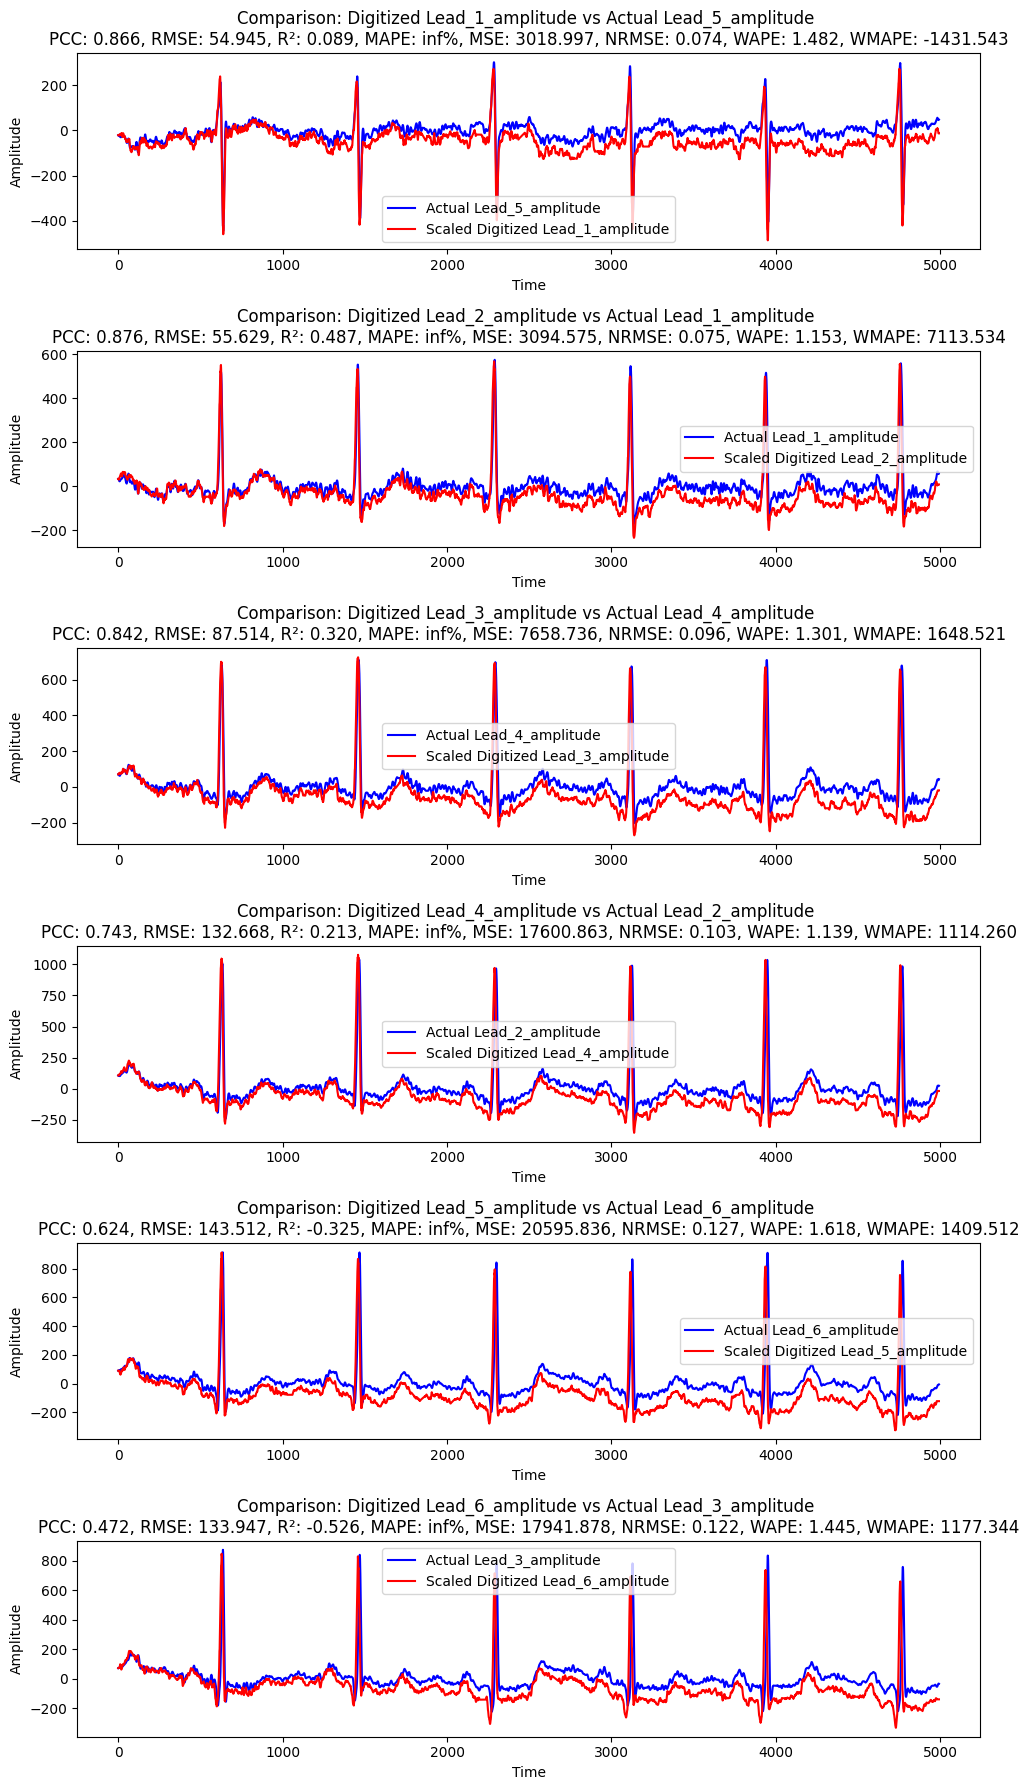


Metrics results:
Lead_1_amplitude: PCC = 0.866, RMSE = 54.945, R² = 0.089, MAPE = inf%, MSE = 3018.997, NRMSE = 0.074, WAPE = 1.482, WMAPE = -1431.543%
Lead_2_amplitude: PCC = 0.876, RMSE = 55.629, R² = 0.487, MAPE = inf%, MSE = 3094.575, NRMSE = 0.075, WAPE = 1.153, WMAPE = 7113.534%
Lead_3_amplitude: PCC = 0.842, RMSE = 87.514, R² = 0.320, MAPE = inf%, MSE = 7658.736, NRMSE = 0.096, WAPE = 1.301, WMAPE = 1648.521%
Lead_4_amplitude: PCC = 0.743, RMSE = 132.668, R² = 0.213, MAPE = inf%, MSE = 17600.863, NRMSE = 0.103, WAPE = 1.139, WMAPE = 1114.260%
Lead_5_amplitude: PCC = 0.624, RMSE = 143.512, R² = -0.325, MAPE = inf%, MSE = 20595.836, NRMSE = 0.127, WAPE = 1.618, WMAPE = 1409.512%
Lead_6_amplitude: PCC = 0.472, RMSE = 133.947, R² = -0.526, MAPE = inf%, MSE = 17941.878, NRMSE = 0.122, WAPE = 1.445, WMAPE = 1177.344%


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# File paths
# digitized_file_path = r"ecg_time_amplitude.csv"  # Path to your digitized data file
digitized_file_path = r"D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\Jo Orig V8\digitized_coordinates\171_F_page_1.csv"  # Path to your digitized data file
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120205.926316_new.csv"  # Path to your actual data file for 86
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120219.848511_new.csv"  # Path to your actual data file for 105
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120222.630823_new.csv"  # Path to your actual data file For 108 page 1
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120306.333710_new.csv"  # Path to your actual data file For 158 page 1
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120237.239201.csv"  # Path to your actual data file For 124 page 1
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120217.223215.csv"  # Path to your actual data file For 102 page 1
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120225.390380.csv"  # Path to your actual data file For 111 page 1
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120327.583812.csv"  # Path to your actual data file For 182 page 1
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120307.255307.csv"  # Path to your actual data file For 159 page 1
actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120317.871143.csv"  # Path to your actual data file For 171 page 1
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120318.802568.csv"  # Path to your actual data file For 172 page 1

# Load the data
digitized_df = pd.read_csv(digitized_file_path)
actual_df = pd.read_csv(actual_file_path)

# Leads to validate
leads_to_validate = [f'Lead_{i}_amplitude' for i in range(1, 7)]  # Lead_1 to Lead_6

# Smooth the digitized data with a moving average
def smooth_leads_with_moving_average(digitized_df, window_size=5):
    """Apply moving average smoothing to the digitized leads data."""
    digitized_df_smoothed = digitized_df.copy()
    for lead in digitized_df.columns:
        digitized_df_smoothed[lead] = digitized_df[lead].rolling(window=window_size, center=True).mean()
    return digitized_df_smoothed

digitized_df_smoothed = smooth_leads_with_moving_average(digitized_df, window_size=7)
digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')

# # Lead mapping (mapping digitized leads to actual leads)
# lead_mapping = {
#     'Lead_1_amplitude': 'Lead_5_amplitude',
#     'Lead_2_amplitude': 'Lead_1_amplitude',
#     'Lead_3_amplitude': 'Lead_2_amplitude',
#     'Lead_4_amplitude': ('Lead_4_amplitude', True),  # Flip Lead_4 of actual_df
#     'Lead_5_amplitude': 'Lead_6_amplitude',
#     'Lead_6_amplitude': 'Lead_3_amplitude'
# }

# TEST NEW Lead mapping (mapping digitized leads to actual leads)
lead_mapping = {
    'Lead_1_amplitude': 'Lead_5_amplitude',
    'Lead_2_amplitude': 'Lead_1_amplitude',
    'Lead_3_amplitude': ('Lead_4_amplitude', True),  # Flip Lead_4 of actual_df
    'Lead_4_amplitude': 'Lead_2_amplitude',
    'Lead_5_amplitude': 'Lead_6_amplitude',
    'Lead_6_amplitude': 'Lead_3_amplitude'
}

# Min-max scaling based on lead mappings
def apply_min_max_scaling(digitized_df, actual_df, lead_mapping):
    """
    Apply min-max scaling to the digitized data based on the actual data, following the lead mappings.
    """
    digitized_df_scaled = digitized_df.copy()

    for digitized_lead, actual_lead in lead_mapping.items():
        # Handle flipping if needed
        if isinstance(actual_lead, tuple):
            actual_lead, flip = actual_lead
        else:
            flip = False

        # Ensure both leads exist in the DataFrames
        if digitized_lead not in digitized_df.columns or actual_lead not in actual_df.columns:
            print(f"Warning: Lead '{digitized_lead}' or '{actual_lead}' is missing.")
            continue

        # Get min/max values for scaling
        actual_min = actual_df[actual_lead].min()
        actual_max = actual_df[actual_lead].max()
        digitized_min = digitized_df[digitized_lead].min()
        digitized_max = digitized_df[digitized_lead].max()

        # Min-max scaling formula
        digitized_df_scaled[digitized_lead] = (digitized_df[digitized_lead] - digitized_min) / (digitized_max - digitized_min) * (actual_max - actual_min) + actual_min

        # # Apply flipping to actual data if needed
        # if flip:
        #     digitized_df_scaled[digitized_lead] = -digitized_df_scaled[digitized_lead]

    return digitized_df_scaled

digitized_df_scaled = apply_min_max_scaling(digitized_df_smoothed, actual_df, lead_mapping)


# Define the necessary functions
def pcc(y_true, y_pred):
    """Calculate Pearson Correlation Coefficient."""
    return y_true.corr(y_pred)

def rmse(y_true, y_pred):
    """Calculate Root Mean Squared Error."""
    return sqrt(np.mean((y_true - y_pred) ** 2))
# Define the function to calculate R-squared
def r_squared(y_true, y_pred):
    """Calculate R-squared error."""
    ss_res = np.sum((y_true - y_pred) ** 2)  # Sum of squared residuals
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # Total sum of squares
    return 1 - (ss_res / ss_tot)

# Additional metric calculations
def mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)."""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mse(y_true, y_pred):
    """Calculate Mean Squared Error (MSE)."""
    return np.mean((y_true - y_pred) ** 2)

def nrmse(y_true, y_pred):
    """Calculate Normalized Root Mean Squared Error (NRMSE)."""
    return rmse(y_true, y_pred) / (y_true.max() - y_true.min())

def wape(y_true, y_pred):
    """Calculate Weighted Absolute Percentage Error (WAPE)."""
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true))

def wmape(y_true, y_pred):
    """Calculate Weighted Mean Absolute Percentage Error (WMAPE)."""
    return 100 * np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)

# Update the plotting function to include additional metrics
def plot_scaled_digitized_single_column_with_metrics(digitized_df_scaled, actual_df, lead_mapping):
    """
    Plots each mapped lead's time-amplitude for scaled digitized data in a single column layout and calculates
    various metrics: PCC, RMSE, R², MAPE, MSE, NRMSE, WAPE, WMAPE.
    """
    num_leads = len(lead_mapping)
    plt.figure(figsize=(10, num_leads * 3))

    metrics_results = {
        'PCC': {},
        'RMSE': {},
        'R²': {},
        'MAPE': {},
        'MSE': {},
        'NRMSE': {},
        'WAPE': {},
        'WMAPE': {},
    }

    # Plot each lead based on the mapping
    for i, (digitized_lead, actual_lead) in enumerate(lead_mapping.items()):
        if isinstance(actual_lead, tuple):
            actual_lead, flip = actual_lead
        else:
            flip = False
        print(f"Comparing leads: digi: {digitized_lead} actual: {actual_lead}")

        if digitized_lead not in digitized_df_scaled.columns or actual_lead not in actual_df.columns:
            print(f"Skipping lead comparison: {digitized_lead} vs {actual_lead} as one is missing in the DataFrame")
            continue

        # Align lengths by truncating
        length = min(len(actual_df[actual_lead]), len(digitized_df_scaled[digitized_lead]))
        y_actual = actual_df[actual_lead].iloc[:length]
        y_digitized = digitized_df_scaled[digitized_lead].iloc[:length]

        # Flip actual lead if specified
        if flip:
            y_actual = -y_actual

        # Invert the digitized values
        y_digitized = -y_digitized

        # Calculate the shift to align the digitized values with the actual values
        shift_amount = y_actual.iloc[0] - y_digitized.iloc[0]
        y_digitized += shift_amount  # Shift the digitized values

        # Calculate metrics
        metrics_results['PCC'][digitized_lead] = pcc(y_actual, y_digitized)
        metrics_results['RMSE'][digitized_lead] = rmse(y_actual, y_digitized)
        metrics_results['R²'][digitized_lead] = r_squared(y_actual, y_digitized)
        metrics_results['MAPE'][digitized_lead] = mape(y_actual, y_digitized)
        metrics_results['MSE'][digitized_lead] = mse(y_actual, y_digitized)
        metrics_results['NRMSE'][digitized_lead] = nrmse(y_actual, y_digitized)
        metrics_results['WAPE'][digitized_lead] = wape(y_actual, y_digitized)
        metrics_results['WMAPE'][digitized_lead] = wmape(y_actual, y_digitized)

        # Plotting
        plt.subplot(num_leads, 1, i + 1)
        plt.plot(y_actual, label=f'Actual {actual_lead}', color='blue')
        plt.plot(y_digitized, label=f'Scaled Digitized {digitized_lead}', color='red')
        plt.title(f'Comparison: Digitized {digitized_lead} vs Actual {actual_lead} \n'
                  f'PCC: {metrics_results["PCC"][digitized_lead]:.3f}, '
                  f'RMSE: {metrics_results["RMSE"][digitized_lead]:.3f}, '
                  f'R²: {metrics_results["R²"][digitized_lead]:.3f}, '
                  f'MAPE: {metrics_results["MAPE"][digitized_lead]:.3f}%, '
                  f'MSE: {metrics_results["MSE"][digitized_lead]:.3f}, '
                  f'NRMSE: {metrics_results["NRMSE"][digitized_lead]:.3f}, '
                  f'WAPE: {metrics_results["WAPE"][digitized_lead]:.3f}, '
                  f'WMAPE: {metrics_results["WMAPE"][digitized_lead]:.3f}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()

    plt.tight_layout()
    plt.show()

    # Output metrics results
    print("\nMetrics results:")
    for lead in metrics_results['PCC']:
        print(f"{lead}: "
              f"PCC = {metrics_results['PCC'][lead]:.3f}, "
              f"RMSE = {metrics_results['RMSE'][lead]:.3f}, "
              f"R² = {metrics_results['R²'][lead]:.3f}, "
              f"MAPE = {metrics_results['MAPE'][lead]:.3f}%, "
              f"MSE = {metrics_results['MSE'][lead]:.3f}, "
              f"NRMSE = {metrics_results['NRMSE'][lead]:.3f}, "
              f"WAPE = {metrics_results['WAPE'][lead]:.3f}, "
              f"WMAPE = {metrics_results['WMAPE'][lead]:.3f}%")

# Call the updated function
plot_scaled_digitized_single_column_with_metrics(digitized_df_scaled, actual_df, lead_mapping)



## Validation of all files

In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_performance_metrics(y_actual, y_digitized):
    """Calculate all performance metrics."""
    metrics = {}

    # MAE
    metrics['MAE'] = mean_absolute_error(y_actual, y_digitized)
    
    # # MAPE
    # metrics['MAPE'] = np.mean(np.abs((y_actual - y_digitized) / y_actual)) * 100
    
    # MSE
    metrics['MSE'] = mean_squared_error(y_actual, y_digitized)
    
    # RMSE
    metrics['RMSE'] = np.sqrt(metrics['MSE'])
    
    # NRMSE
    metrics['NRMSE'] = metrics['RMSE'] / (y_actual.max() - y_actual.min())
    
    # WAPE
    metrics['WAPE'] = np.sum(np.abs(y_actual - y_digitized)) / np.sum(np.abs(y_actual))
    
    # WMAPE
    metrics['WMAPE'] = np.sum(np.abs(y_actual - y_digitized)) / np.sum(y_actual)
    
    # R²
    metrics['Rsq'] = r2_score(y_actual, y_digitized)

    return metrics


def store_performance_to_csv(csv_file, results):
    """Store performance metrics to CSV."""
    df = pd.DataFrame(results)
    df.to_csv(csv_file, index=False)
    print(f"Performance metrics saved to {csv_file}")

def plot_scaled_digitized_single_column(digitized_df_scaled, actual_df, lead_mapping, save_path):
    """
    Plots each mapped lead's time-amplitude for scaled digitized data in a single column layout.
    
    :param digitized_df_scaled: DataFrame containing scaled digitized data.
    :param actual_df: DataFrame containing actual data for reference.
    :param lead_mapping: Dictionary specifying the mapping from digitized leads to actual leads. 
    :param save_path: Path to save the plot.
    """
    num_leads = len(lead_mapping)
    plt.figure(figsize=(10, num_leads * 2))

    # Plot each lead based on the mapping
    for i, (digitized_lead, actual_lead) in enumerate(lead_mapping.items()):
        if isinstance(actual_lead, tuple):
            actual_lead, flip = actual_lead
        else:
            flip = False

        if digitized_lead not in digitized_df_scaled.columns or actual_lead not in actual_df.columns:
            print(f"Skipping lead comparison: {digitized_lead} vs {actual_lead} as one is missing in the DataFrame")
            continue

        # Align lengths by truncating
        length = min(len(actual_df[actual_lead]), len(digitized_df_scaled[digitized_lead]))
        y_actual = actual_df[actual_lead].iloc[:length]
        y_digitized = digitized_df_scaled[digitized_lead].iloc[:length]

        # Flip actual lead if specified
        if flip:
            y_actual = -y_actual

        # Invert the digitized values
        y_digitized = -y_digitized

        # Calculate the shift to align the digitized values with the actual values
        shift_amount = y_actual.iloc[0] - y_digitized.iloc[0]
        y_digitized += shift_amount  # Shift the digitized values

        # Plotting
        plt.subplot(num_leads, 1, i + 1)
        plt.plot(y_actual, label=f'Actual {actual_lead}', color='blue')
        plt.plot(y_digitized, label=f'Scaled Digitized {digitized_lead}', color='red')
        plt.title(f'Comparison: Digitized {digitized_lead} vs Actual {actual_lead}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()

    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()
    print(f"Plot saved at: {save_path}")

def plot_lead_distributions(digitized_df_scaled, actual_df, lead_mapping, save_path, page):
    """
    Plots distribution of each mapped lead's time-amplitude for scaled digitized and actual data.
    
    :param digitized_df_scaled: DataFrame containing scaled digitized data.
    :param actual_df: DataFrame containing actual data for reference.
    :param lead_mapping: Dictionary specifying the mapping from digitized leads to actual leads. 
    :param save_path: Path to save the plot.
    :param page: Page number to distinguish between page 1 and 2.
    """
    num_leads = len(lead_mapping)
    plt.figure(figsize=(12, num_leads * 4))

    # Plot each lead based on the mapping
    for i, (digitized_lead, actual_lead) in enumerate(lead_mapping.items()):
        if isinstance(actual_lead, tuple):
            actual_lead, flip = actual_lead
        else:
            flip = False

        if digitized_lead not in digitized_df_scaled.columns or actual_lead not in actual_df.columns:
            print(f"Skipping lead distribution: {digitized_lead} vs {actual_lead} as one is missing in the DataFrame")
            continue

        # Align lengths by truncating
        length = min(len(actual_df[actual_lead]), len(digitized_df_scaled[digitized_lead]))
        y_actual = actual_df[actual_lead].iloc[:length]
        y_digitized = digitized_df_scaled[digitized_lead].iloc[:length]

        # Flip actual lead if specified
        if flip:
            y_actual = -y_actual

        # Invert the digitized values
        y_digitized = -y_digitized

        # Calculate the shift to align the digitized values with the actual values
        shift_amount = y_actual.iloc[0] - y_digitized.iloc[0]
        y_digitized += shift_amount  # Shift the digitized values

        # Plot distributions
        plt.subplot(num_leads, 1, i + 1)
        plt.hist(y_actual, bins=50, alpha=0.5, label=f'Actual {actual_lead} (Page {page})', color='blue')
        plt.hist(y_digitized, bins=50, alpha=0.5, label=f'Scaled Digitized {digitized_lead} (Page {page})', color='red')
        plt.title(f'Distribution: Digitized {digitized_lead} vs Actual {actual_lead}')
        plt.xlabel('Amplitude')
        plt.ylabel('Frequency')
        plt.legend()

    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()
    print(f"Distribution plot saved at: {save_path}")


# Smooth the digitized data with a moving average
def smooth_leads_with_moving_average(digitized_df, window_size=5):
    """Apply moving average smoothing to the digitized leads data."""
    digitized_df_smoothed = digitized_df.copy()
    for lead in digitized_df.columns:
        digitized_df_smoothed[lead] = digitized_df[lead].rolling(window=window_size, center=True).mean()
    return digitized_df_smoothed
    
# Min-max scaling based on lead mappings
def apply_min_max_scaling(digitized_df, actual_df, lead_mapping):
    """
    Apply min-max scaling to the digitized data based on the actual data, following the lead mappings.
    """
    digitized_df_scaled = digitized_df.copy()

    for digitized_lead, actual_lead in lead_mapping.items():
        # Handle flipping if needed
        if isinstance(actual_lead, tuple):
            actual_lead, flip = actual_lead
        else:
            flip = False

        # Ensure both leads exist in the DataFrames
        if digitized_lead not in digitized_df.columns or actual_lead not in actual_df.columns:
            print(f"Warning: Lead '{digitized_lead}' or '{actual_lead}' is missing.")
            continue

        # Get min/max values for scaling
        actual_min = actual_df[actual_lead].min()
        actual_max = actual_df[actual_lead].max()
        digitized_min = digitized_df[digitized_lead].min()
        digitized_max = digitized_df[digitized_lead].max()

        # Min-max scaling formula
        digitized_df_scaled[digitized_lead] = (digitized_df[digitized_lead] - digitized_min) / (digitized_max - digitized_min) * (actual_max - actual_min) + actual_min

    return digitized_df_scaled

# Load the file2id.csv file
file2id_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\file2id.csv"
file2id_df = pd.read_csv(file2id_path)

# Define paths
digitized_folder = r"D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates"
actual_folder = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new"
validation_folder = r"D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\validation"


# Main loop to iterate through files and calculate performance metrics
performance_results = []

# Iterate through the file2id.csv and match the files
for _, row in file2id_df.iterrows():
    id_value = str(row['ID'])
    x_value = row['X.0']
    
    print(f"\nProcessing ID: {id_value} with X.0: {x_value}")

    for page in [1, 2]:
        # Define the file names for both pages
        digitized_file_name = f"{id_value}_F_page_{page}.csv"
        actual_file_name = f"{x_value}.csv"

        digitized_file_path = os.path.join(digitized_folder, digitized_file_name)
        actual_file_path = os.path.join(actual_folder, actual_file_name)

        # Ensure both files exist
        if not os.path.exists(digitized_file_path):
            print(f"Digitized file not found for ID: {id_value}, page {page}")
            continue

        if not os.path.exists(actual_file_path):
            print(f"Actual file not found for X.0: {x_value}")
            continue

        # Load the data
        print(f"Loading files:\nDigitized: {digitized_file_path}\nActual: {actual_file_path}")
        digitized_df = pd.read_csv(digitized_file_path)
        actual_df = pd.read_csv(actual_file_path)

        # Define lead mappings for both pages
        if page == 1:
            lead_mapping = {
                'Lead_1_amplitude': 'Lead_5_amplitude',
                'Lead_2_amplitude': 'Lead_1_amplitude',
                'Lead_3_amplitude': ('Lead_4_amplitude', True),  # Flip Lead_4 of actual_df
                'Lead_4_amplitude': 'Lead_2_amplitude',
                'Lead_5_amplitude': 'Lead_6_amplitude',
                'Lead_6_amplitude': 'Lead_3_amplitude'
            }
            validation_file_name = f"{id_value}_validation_page_1.png"
        else:
            lead_mapping = {
                'Lead_1_amplitude': 'Lead_7_amplitude',
                'Lead_2_amplitude': 'Lead_8_amplitude',
                'Lead_3_amplitude': 'Lead_9_amplitude',
                'Lead_4_amplitude': 'Lead_10_amplitude',
                'Lead_5_amplitude': 'Lead_11_amplitude',
                'Lead_6_amplitude': 'Lead_12_amplitude'
            }
            validation_file_name = f"{id_value}_validation_page_2.png"

        # Leads to validate
        leads_to_validate = [f'Lead_{i}_amplitude' for i in range(1, 7)]

        digitized_df_smoothed = smooth_leads_with_moving_average(digitized_df, window_size=7)
        digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')

        digitized_df_scaled = apply_min_max_scaling(digitized_df_smoothed, actual_df, lead_mapping)

        for digitized_lead, actual_lead in lead_mapping.items():
            if isinstance(actual_lead, tuple):
                actual_lead, flip = actual_lead
            else:
                flip = False

            if digitized_lead not in digitized_df_scaled.columns or actual_lead not in actual_df.columns:
                continue

            length = min(len(actual_df[actual_lead]), len(digitized_df_scaled[digitized_lead]))
            y_actual = actual_df[actual_lead].iloc[:length]
            y_digitized = digitized_df_scaled[digitized_lead].iloc[:length]

            if flip:
                y_actual = -y_actual

            y_digitized = -y_digitized
            shift_amount = y_actual.iloc[0] - y_digitized.iloc[0]
            y_digitized += shift_amount

            metrics = calculate_performance_metrics(y_actual, y_digitized)

            # Adjust lead number based on page
            lead_num = int(digitized_lead.split('_')[1])  # Extract the lead number from 'Lead_X_amplitude'
            if page == 2:
                lead_num += 6  # For page 2, adjust lead numbers from 1-6 to 7-12

            # Append results for each lead
            performance_results.append({
                'Filename': digitized_file_name,
                'Page': page,
                'Lead': f'Lead_{lead_num}', 
                **metrics
            })


# Save the performance results to a CSV file
performance_csv_path = "ecg_performance_metrics.csv"
store_performance_to_csv(performance_csv_path, performance_results)

        # # Plot and save to validation folder
        # save_path = os.path.join(validation_folder, validation_file_name)
        # print(f"Saving plot to: {save_path}")
        # plot_scaled_digitized_single_column(digitized_df_scaled, actual_df, lead_mapping, save_path)


        # # Define paths for saving the distribution plots
        # distribution_save_path_page_1 = os.path.join(validation_folder, f"{id_value}_distribution_page_1.png")
        # distribution_save_path_page_2 = os.path.join(validation_folder, f"{id_value}_distribution_page_2.png")

        # # Plot the distributions for page 1 and page 2
        # if page == 1:
        #     plot_lead_distributions(digitized_df_scaled, actual_df, lead_mapping, distribution_save_path_page_1, page=1)
        # else:
        #     plot_lead_distributions(digitized_df_scaled, actual_df, lead_mapping, distribution_save_path_page_2, page=2)


Processing ID: 105 with X.0: 20230427-120219.848511
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\105_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120219.848511.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\105_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120219.848511.csv

Processing ID: 49 with X.0: 20230427-120154.542147
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\49_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120154.542147.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\49_F_page_2.csv
Actual:

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L


Processing ID: 158 with X.0: 20230427-120306.333710
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\158_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120306.333710.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\158_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120306.333710.csv

Processing ID: 109 with X.0: 20230427-120223.555031
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\109_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120223.555031.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\109_F_page_2.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\78_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120203.154255.csv

Processing ID: 118 with X.0: 20230427-120231.707890
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\118_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120231.707890.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\118_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120231.707890.csv

Processing ID: 137 with X.0: 20230427-120248.630478
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\137_F_page_1.csv
Actua

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L


Processing ID: 145 with X.0: 20230427-120255.614515
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\145_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120255.614515.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\145_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120255.614515.csv

Processing ID: 140 with X.0: 20230427-120251.349105
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\140_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120251.349105.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\140_F_page_2.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L


Processing ID: 94 with X.0: 20230427-120212.020009
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\94_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120212.020009.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\94_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120212.020009.csv

Processing ID: 172 with X.0: 20230427-120318.802568
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\172_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120318.802568.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\172_F_page_2.csv
Actual:

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L


Processing ID: 111 with X.0: 20230427-120225.390380
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\111_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120225.390380.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\111_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120225.390380.csv

Processing ID: 92 with X.0: 20230427-120210.316835
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\92_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120210.316835.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\92_F_page_2.csv
Actual:

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\89_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120207.754298.csv

Processing ID: 124 with X.0: 20230427-120237.239201
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\124_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120237.239201.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\124_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120237.239201.csv

Processing ID: 104 with X.0: 20230427-120218.926485
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\104_F_page_1.csv
Actua

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\191_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120335.474559.csv

Processing ID: 190 with X.0: 20230427-120334.552653
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\190_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120334.552653.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\190_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120334.552653.csv

Processing ID: 193 with X.0: 20230427-120337.146463
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\193_F_page_1.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\76_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120202.238558.csv

Processing ID: 181 with X.0: 20230427-120326.662360
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\181_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120326.662360.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\181_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120326.662360.csv

Processing ID: 183 with X.0: 20230427-120328.505690
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\183_F_page_1.csv
Actua

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\200_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120343.073730.csv

Processing ID: 150 with X.0: 20230427-120259.130224
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\150_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120259.130224.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\150_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120259.130224.csv

Processing ID: 202 with X.0: 20230427-120344.740357
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\202_F_page_1.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L


Processing ID: 187 with X.0: 20230427-120331.974488
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\187_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120331.974488.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\187_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120331.974488.csv

Processing ID: 107 with X.0: 20230427-120221.692046
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\107_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120221.692046.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\107_F_page_2.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\101_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120216.379470.csv

Processing ID: 113 with X.0: 20230427-120227.160854
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\113_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120227.160854.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\113_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120227.160854.csv

Processing ID: 106 with X.0: 20230427-120220.770360
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\106_F_page_1.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L


Processing ID: 143 with X.0: 20230427-120253.911563
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\143_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120253.911563.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\143_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120253.911563.csv

Processing ID: 85 with X.0: 20230427-120204.988880
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\85_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120204.988880.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\85_F_page_2.csv
Actual:

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L


Processing ID: 52 with X.0: 20230427-120157.113443
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\52_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120157.113443.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\52_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120157.113443.csv

Processing ID: 91 with X.0: 20230427-120209.458513
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\91_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120209.458513.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\91_F_page_2.csv
Actual: D:

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L


Processing ID: 127 with X.0: 20230427-120239.864635
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\127_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120239.864635.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\127_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120239.864635.csv

Processing ID: 110 with X.0: 20230427-120224.473329
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\110_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120224.473329.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\110_F_page_2.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L


Processing ID: 19 with X.0: 20230427-120152.754186
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\19_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120152.754186.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\19_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120152.754186.csv

Processing ID: 102 with X.0: 20230427-120217.223215
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\102_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120217.223215.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\102_F_page_2.csv
Actual:

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\152_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120300.817726.csv

Processing ID: 133 with X.0: 20230427-120245.145585
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\133_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120245.145585.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\133_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120245.145585.csv

Processing ID: 129 with X.0: 20230427-120241.708035
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\129_F_page_1.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L


Processing ID: 136 with X.0: 20230427-120247.710005
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\136_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120247.710005.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\136_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120247.710005.csv

Processing ID: 123 with X.0: 20230427-120236.301684
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\123_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120236.301684.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\123_F_page_2.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L


Processing ID: 180 with X.0: 20230427-120325.802513
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\180_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120325.802513.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\180_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120325.802513.csv

Processing ID: 114 with X.0: 20230427-120228.092168
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\114_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120228.092168.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\114_F_page_2.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\120_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120233.548460.csv

Processing ID: 162 with X.0: 20230427-120309.958543
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\162_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120309.958543.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\162_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120309.958543.csv

Processing ID: 170 with X.0: 20230427-120316.911999
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\170_F_page_1.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L


Processing ID: 176 with X.0: 20230427-120322.255731
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\176_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120322.255731.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\176_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120322.255731.csv

Processing ID: 167 with X.0: 20230427-120314.224168
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\167_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120314.224168.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\167_F_page_2.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\97_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120212.932599.csv

Processing ID: 50 with X.0: 20230427-120155.395954
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\50_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120155.395954.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\50_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120155.395954.csv

Processing ID: 53 with X.0: 20230427-120157.988050
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\53_F_page_1.csv
Actual: D:

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\51_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120156.254331.csv

Processing ID: 196 with X.0: 20230427-120339.677784
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\196_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120339.677784.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\196_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120339.677784.csv

Processing ID: 99 with X.0: 20230427-120214.707530
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\99_F_page_1.csv
Actual:

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\75_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120201.379552.csv

Processing ID: 160 with X.0: 20230427-120308.184336
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\160_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120308.184336.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\160_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120308.184336.csv

Processing ID: 179 with X.0: 20230427-120324.958748
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\179_F_page_1.csv
Actua

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L


Processing ID: 112 with X.0: 20230427-120226.301848
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\112_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120226.301848.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\112_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120226.301848.csv

Processing ID: 154 with X.0: 20230427-120302.661548
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\154_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120302.661548.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\154_F_page_2.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L


Processing ID: 103 with X.0: 20230427-120218.075349
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\103_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120218.075349.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\103_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120218.075349.csv

Processing ID: 125 with X.0: 20230427-120238.098750
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\125_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120238.098750.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\125_F_page_2.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\132_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120244.286533.csv

Processing ID: 198 with X.0: 20230427-120341.396522
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\198_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120341.396522.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\198_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120341.396522.csv

Processing ID: 184 with X.0: 20230427-120329.427634
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\184_F_page_1.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L


Processing ID: 90 with X.0: 20230427-120208.614006
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\90_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120208.614006.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\90_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120208.614006.csv

Processing ID: 138 with X.0: 20230427-120249.567572
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\138_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120249.567572.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\138_F_page_2.csv
Actual:

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L


Processing ID: 157 with X.0: 20230427-120305.427185
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\157_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120305.427185.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\157_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120305.427185.csv

Processing ID: 93 with X.0: 20230427-120211.176228
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\93_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120211.176228.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\93_F_page_2.csv
Actual:

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\195_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120338.818694.csv

Processing ID: 134 with X.0: 20230427-120246.005129
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\134_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120246.005129.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\134_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120246.005129.csv

Processing ID: 189 with X.0: 20230427-120333.693233
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\189_F_page_1.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\135_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120246.864403.csv

Processing ID: 116 with X.0: 20230427-120229.864064
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\116_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120229.864064.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\116_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120229.864064.csv

Processing ID: 146 with X.0: 20230427-120256.520966
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\146_F_page_1.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\130_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120242.567609.csv

Processing ID: 188 with X.0: 20230427-120332.822624
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\188_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120332.822624.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\188_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120332.822624.csv

Processing ID: 177 with X.0: 20230427-120323.168907
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\177_F_page_1.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L


Processing ID: 174 with X.0: 20230427-120320.536846
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\174_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120320.536846.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\174_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120320.536846.csv

Processing ID: 166 with X.0: 20230427-120313.295568
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\166_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120313.295568.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\166_F_page_2.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\144_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120254.755576.csv

Processing ID: 168 with X.0: 20230427-120315.146098
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\168_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120315.146098.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\168_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120315.146098.csv

Processing ID: 175 with X.0: 20230427-120321.396185
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\175_F_page_1.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\159_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120307.255307.csv

Processing ID: 155 with X.0: 20230427-120303.580769
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\155_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120303.580769.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\155_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120303.580769.csv

Processing ID: 153 with X.0: 20230427-120301.739962
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\153_F_page_1.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L


Processing ID: 169 with X.0: 20230427-120316.052364
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\169_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120316.052364.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\169_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120316.052364.csv

Processing ID: 171 with X.0: 20230427-120317.871143
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\171_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120317.871143.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\171_F_page_2.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\55_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120159.707242.csv

Processing ID: 182 with X.0: 20230427-120327.583812
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\182_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120327.583812.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\182_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120327.583812.csv

Processing ID: 37 with X.0: 20230427-120153.690516
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\37_F_page_1.csv
Actual:

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\128_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120240.786101.csv

Processing ID: 131 with X.0: 20230427-120243.442490
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\131_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120243.442490.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\131_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120243.442490.csv

Processing ID: 115 with X.0: 20230427-120229.004805
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\115_F_page_1.csv
Actu

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L


Processing ID: 79 with X.0: 20230427-120204.066736
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\79_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120204.066736.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\79_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120204.066736.csv

Processing ID: 121 with X.0: 20230427-120234.473840
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\121_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120234.473840.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\121_F_page_2.csv
Actual:

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\108_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120222.630823.csv

Processing ID: 87 with X.0: 20230427-120206.847997
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\87_F_page_1.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120206.847997.csv
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\87_F_page_2.csv
Actual: D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120206.847997.csv

Processing ID: 122 with X.0: 20230427-120235.395463
Loading files:
Digitized: D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\JO Orig V8\digitized_coordinates\122_F_page_1.csv
Actual:

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\2657363940.py:258: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')
C:\Users\ROG\AppData\L

Performance metrics saved to ecg_performance_metrics.csv


## Visualize performance metrices

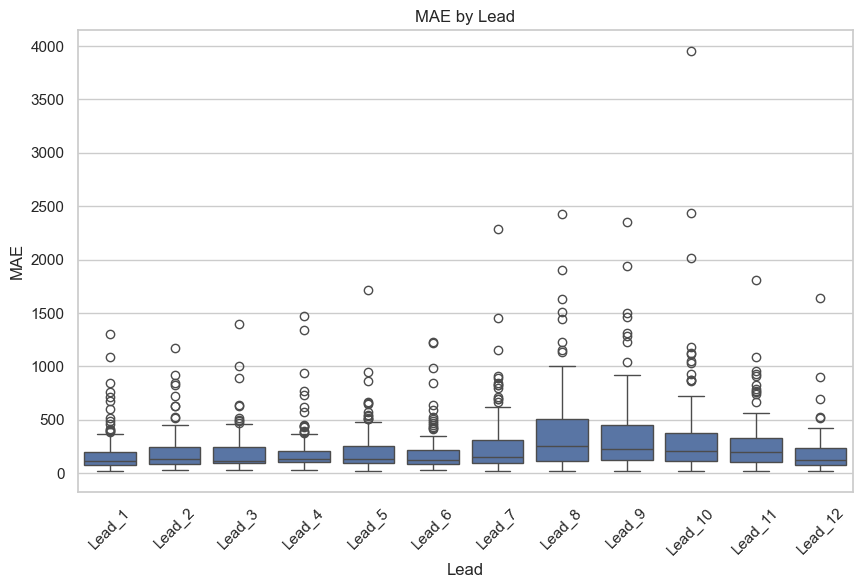

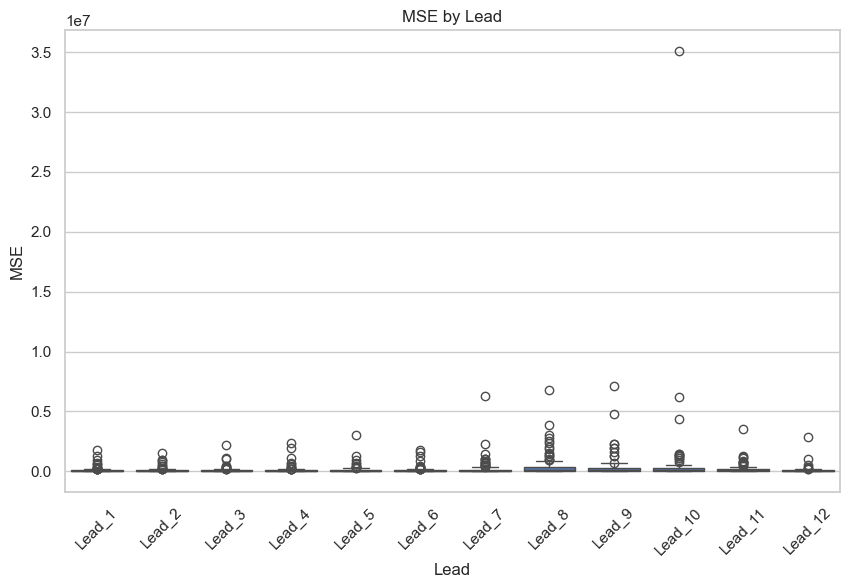

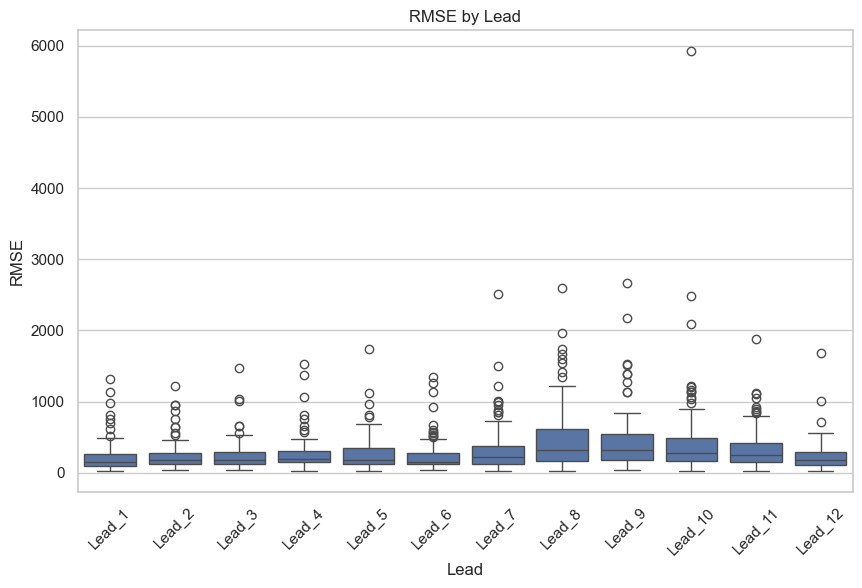

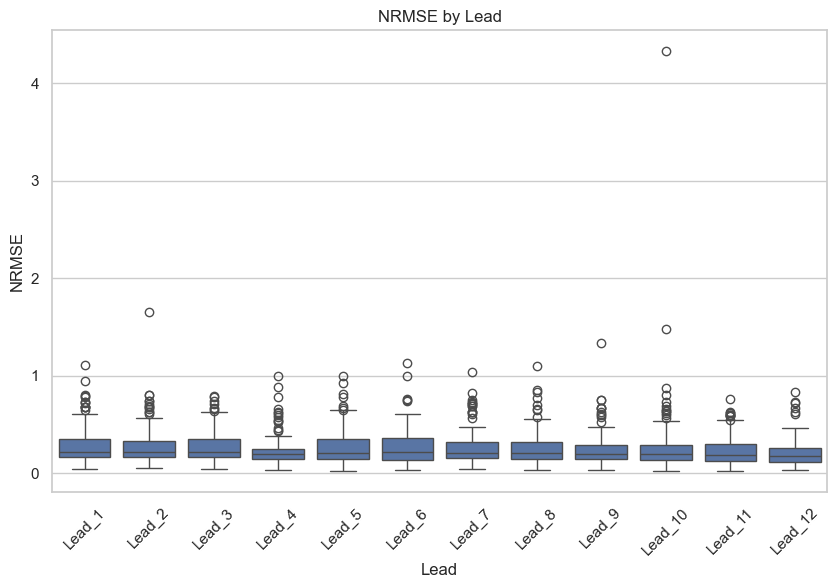

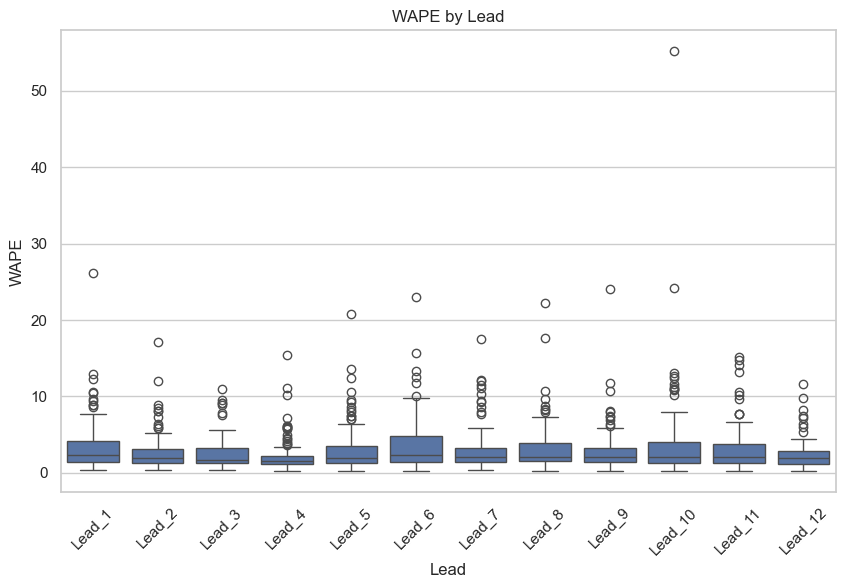

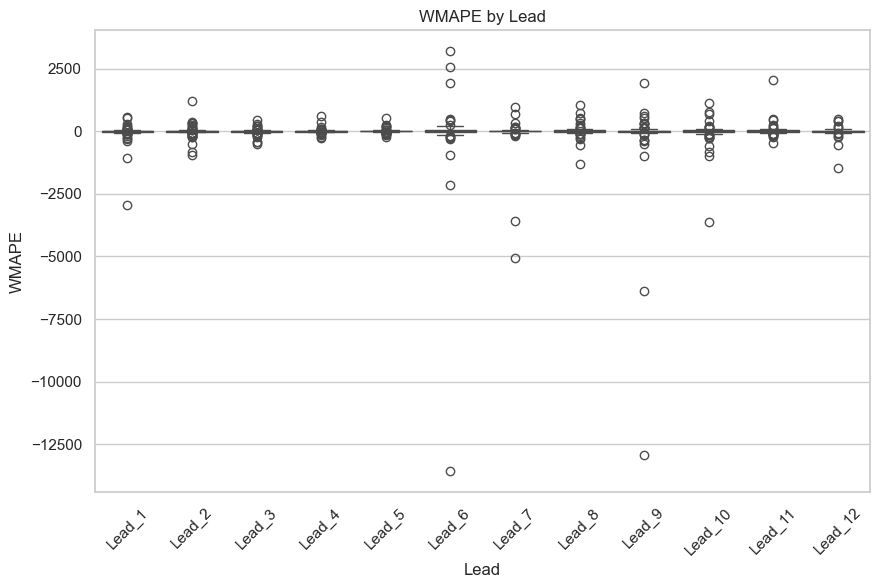

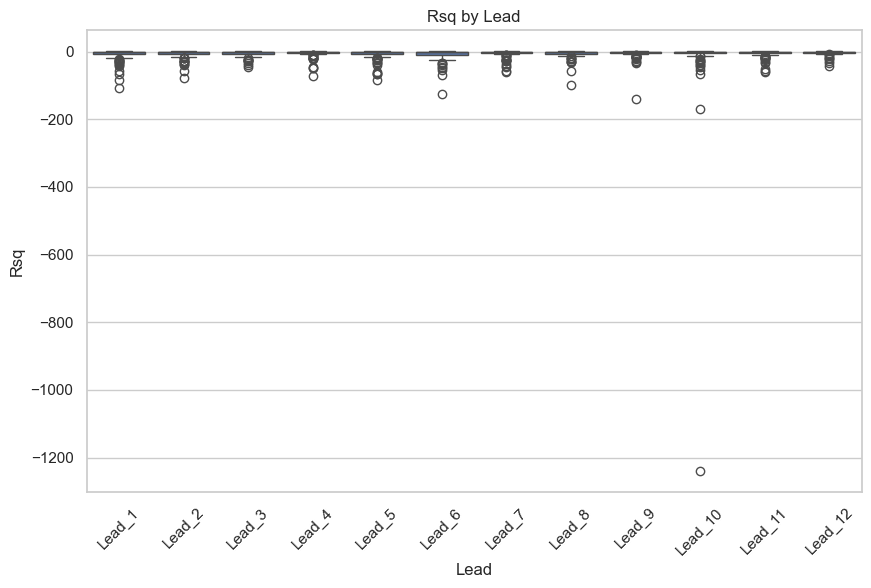

C:\Users\ROG\AppData\Local\Temp\ipykernel_59104\3344657343.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=group_by, y=metric, data=performance_df, estimator=np.mean, ci="sd")


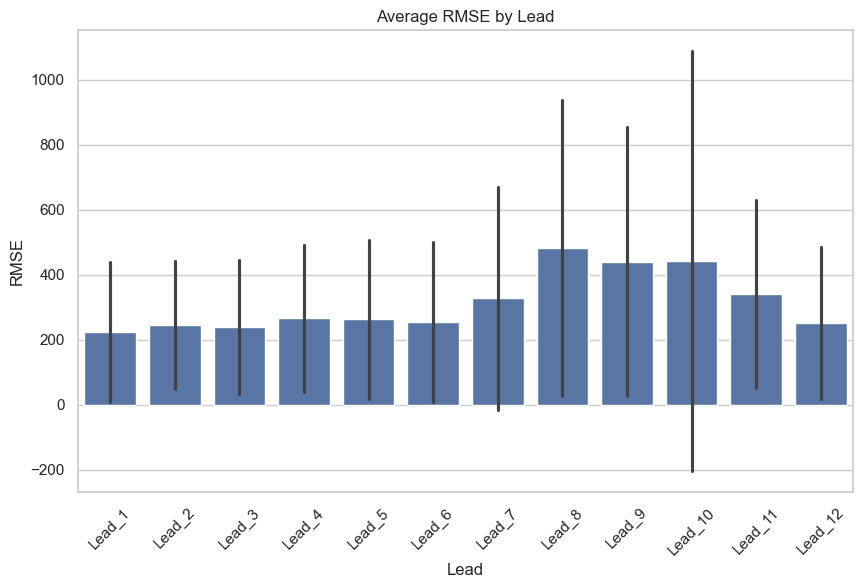

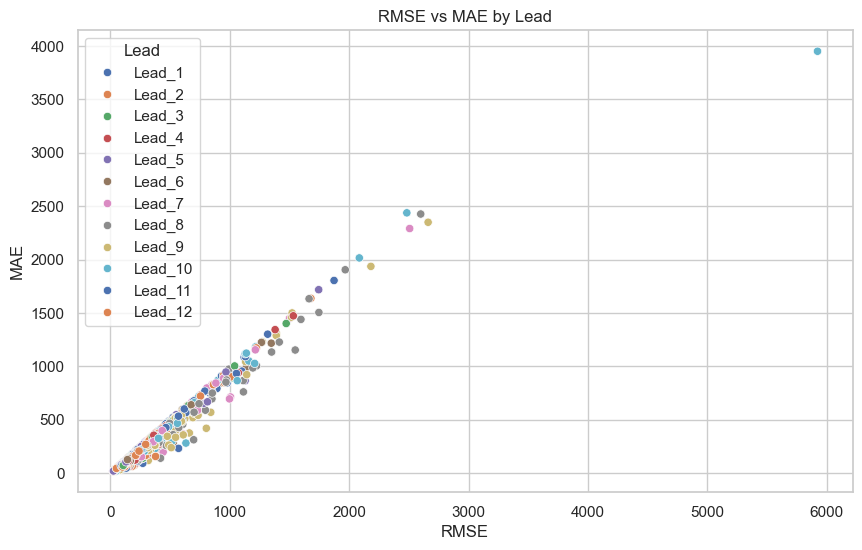

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load performance metrics CSV
performance_df = pd.read_csv('ecg_performance_metrics.csv')

# Set a general style for plots
sns.set(style="whitegrid")

# Function to plot boxplot for each performance metric
def plot_boxplots(performance_df, metrics, group_by='Lead'):
    """Boxplots for each performance metric grouped by 'Lead' or 'Filename'."""
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=group_by, y=metric, data=performance_df)
        plt.title(f'{metric} by {group_by}')
        plt.xticks(rotation=45)
        plt.show()

# # Function to plot heatmap for all performance metrics
# def plot_heatmap(performance_df, metrics, index_column, columns_column):
#     """Heatmap for visualizing performance across leads/files."""
#     pivot_df = performance_df.pivot_table(index=index_column, columns=columns_column, values=metrics)
#     plt.figure(figsize=(12, 8))
#     sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap='coolwarm')
#     plt.title(f'Heatmap of Performance Metrics - {metrics}')
#     plt.show()

# Function to plot bar chart comparing performance of different leads or files
def plot_barplot(performance_df, metric, group_by='Lead'):
    """Barplot for specific performance metric grouped by Lead or Filename."""
    plt.figure(figsize=(10, 6))
    sns.barplot(x=group_by, y=metric, data=performance_df, estimator=np.mean, ci="sd")
    plt.title(f'Average {metric} by {group_by}')
    plt.xticks(rotation=45)
    plt.show()

# Function to plot scatter plot for comparing two metrics
def plot_scatter(performance_df, metric1, metric2, group_by='Lead'):
    """Scatter plot to compare two metrics."""
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=metric1, y=metric2, hue=group_by, data=performance_df, palette="deep")
    plt.title(f'{metric1} vs {metric2} by {group_by}')
    plt.show()

# Define the performance metrics you want to visualize
# metrics = ['MAE', 'MAPE', 'MSE', 'RMSE', 'NRMSE', 'WAPE', 'WMAPE', 'R²']
metrics = ['MAE', 'MSE', 'RMSE', 'NRMSE', 'WAPE', 'WMAPE', 'Rsq']

# Visualize boxplots by Lead
plot_boxplots(performance_df, metrics, group_by='Lead')

# # Visualize heatmap (can group by 'Filename' or 'Lead')
# plot_heatmap(performance_df, 'MAE', index_column='Filename', columns_column='Lead')

# Visualize barplot for RMSE (average performance)
plot_barplot(performance_df, 'RMSE', group_by='Lead')

# Scatter plot to compare two metrics (e.g., RMSE vs MAE)
plot_scatter(performance_df, 'RMSE', 'MAE', group_by='Lead')


In [19]:
import pandas as pd

# Load the performance metrics CSV file
performance_df = pd.read_csv('ecg_performance_metrics.csv')

# Choose the metric(s) to rank by
metric = 'Rsq'  # You can change this to other metrics like 'RMSE', 'MAE', etc.
# MAE	MSE	RMSE	NRMSE	WAPE	WMAPE	Rsq

# Sorting logic: Higher R² (closer to 1) is better, so we sort descending for Rsq
if metric == 'Rsq':
    top_files = performance_df.sort_values(by=metric, ascending=False).head(10)
else:
    top_files = performance_df.sort_values(by=metric, ascending=True).head(10)

print("Top 10 Best Performing Files based on", metric)
print(top_files[['Filename', 'Page', 'Lead', metric]])

# Group by Lead and calculate average metric per lead
lead_performance = performance_df.groupby('Lead')[metric].mean().reset_index()

# Sorting logic: Higher R² is better, so we sort descending for Rsq
if metric == 'Rsq':
    best_leads = lead_performance.sort_values(by=metric, ascending=False).head(10)
else:
    best_leads = lead_performance.sort_values(by=metric, ascending=True).head(10)

print("\nTop 10 Best Performing Leads based on", metric)
print(best_leads)


Top 10 Best Performing Files based on Rsq
              Filename  Page     Lead       Rsq
164   111_F_page_2.csv     2  Lead_10  0.966697
1052  186_F_page_1.csv     1   Lead_5  0.964456
1228  108_F_page_1.csv     1   Lead_5  0.964235
165   111_F_page_2.csv     2  Lead_11  0.962536
588   120_F_page_2.csv     2  Lead_10  0.957509
163   111_F_page_2.csv     2   Lead_9  0.951730
1256  122_F_page_2.csv     2  Lead_12  0.950892
547   178_F_page_1.csv     1   Lead_4  0.947100
1080  159_F_page_2.csv     2  Lead_10  0.938744
166   111_F_page_2.csv     2  Lead_12  0.932177

Top 10 Best Performing Leads based on Rsq
       Lead       Rsq
3   Lead_12 -3.719693
6    Lead_4 -4.725371
11   Lead_9 -5.243954
10   Lead_8 -5.597847
9    Lead_7 -5.681069
2   Lead_11 -5.776637
5    Lead_3 -6.231949
4    Lead_2 -6.944715
7    Lead_5 -8.266469
0    Lead_1 -9.012096


## BEST WAPE RESULTS: use this

In [11]:
import pandas as pd

# Load performance metrics CSV
performance_df = pd.read_csv('ecg_performance_metrics.csv')

# Function to aggregate performance metrics by Filename
def aggregate_file_performance(performance_df, metrics):
    """Aggregate performance metrics by Filename."""
    aggregated_df = performance_df.groupby('Filename')[metrics].mean().reset_index()
    return aggregated_df

# Define the performance metrics to aggregate
metrics = ['MAE', 'MSE', 'RMSE', 'NRMSE', 'WAPE', 'WMAPE', 'Rsq']

# Aggregate performance metrics for each file
aggregated_performance_df = aggregate_file_performance(performance_df, metrics)

# Get top 10 files based on R²
top_files_overall_rsq = aggregated_performance_df.sort_values(by='Rsq', ascending=False).head(10)
print("Top 10 Files based on Overall R²:")
print(top_files_overall_rsq)

# Get top 10 files based on RMSE
top_files_overall_rmse = aggregated_performance_df.sort_values(by='RMSE', ascending=True).head(10)
print("\nTop 10 Files based on Overall RMSE:")
print(top_files_overall_rmse)

# Get top 10 files based on WAPE
top_files_overall_wape = aggregated_performance_df.sort_values(by='WAPE', ascending=True).head(10)
print("\nTop 10 Files based on Overall WAPE:")
print(top_files_overall_wape)

# Get top 10 files based on worst (highest) WAPE
worst_files_overall_wape = aggregated_performance_df.sort_values(by='WAPE', ascending=False).head(10)
print("\nTop 10 Files based on Worst (Highest) WAPE:")
print(worst_files_overall_wape)



Top 10 Files based on Overall R²:
             Filename        MAE           MSE       RMSE     NRMSE      WAPE  \
21   111_F_page_2.csv  25.577115   1598.305932  38.395683  0.029684  0.308948   
14   108_F_page_1.csv  29.553206   1414.534424  36.500444  0.043703  0.414303   
140  178_F_page_1.csv  34.729345   4320.595996  63.624636  0.044488  0.426537   
109  159_F_page_2.csv  40.893790   3849.126927  60.477657  0.042629  0.593912   
149  182_F_page_2.csv  22.820227   2190.808254  43.353436  0.043552  0.504158   
131  172_F_page_2.csv  42.611334   7042.977629  76.346196  0.063228  0.431182   
200   78_F_page_1.csv  51.838833  10529.527999  96.962448  0.083104  0.530306   
97   153_F_page_2.csv  76.209657   8971.686083  94.632875  0.041831  0.878117   
129  171_F_page_2.csv  46.632492  10057.654037  96.463367  0.061008  0.632560   
90   147_F_page_1.csv  56.874819   5496.691593  68.248745  0.059324  0.821540   

          WMAPE       Rsq  
21    -6.456151  0.927264  
14   -21.137877  0

## WAPE Results

In [20]:
import pandas as pd

# Load the performance metrics CSV file
performance_df = pd.read_csv('ecg_performance_metrics.csv')

# Calculate quartiles for WAPE
wape_quartiles = performance_df['WAPE'].quantile([0.25, 0.5, 0.75])

# Display the quartiles
print(f"WAPE Quartiles:\n{wape_quartiles}")

# Define functions to categorize based on quartiles
def categorize_wape(wape, quartiles):
    if wape <= quartiles[0.25]:
        return 'Q1 (Lowest 25%)'
    elif wape <= quartiles[0.50]:
        return 'Q2 (25% to 50%)'
    elif wape <= quartiles[0.75]:
        return 'Q3 (50% to 75%)'
    else:
        return 'Q4 (Highest 25%)'

# Apply the function to create a new column for WAPE quartiles
performance_df['WAPE_Quartile'] = performance_df['WAPE'].apply(categorize_wape, quartiles=wape_quartiles)

# Filter and display filenames, pages, leads, and WAPE values with their quartiles
quartile_results = performance_df[['Filename', 'Page', 'Lead', 'WAPE', 'WAPE_Quartile']].sort_values(by='WAPE')
print(quartile_results)

# Save the quartile results to a CSV file
quartile_results.to_csv('wape_quartile_results.csv', index=False)

# Display quartile categories summary
quartile_summary = quartile_results.groupby('WAPE_Quartile')['Filename'].count().reset_index()
print("\nSummary of WAPE Quartile Distribution:")
print(quartile_summary)


WAPE Quartiles:
0.25    1.298763
0.50    2.002771
0.75    3.476085
Name: WAPE, dtype: float64
              Filename  Page     Lead       WAPE     WAPE_Quartile
1228  108_F_page_1.csv     1   Lead_5   0.196564   Q1 (Lowest 25%)
163   111_F_page_2.csv     2   Lead_9   0.196827   Q1 (Lowest 25%)
1052  186_F_page_1.csv     1   Lead_5   0.216328   Q1 (Lowest 25%)
139   172_F_page_2.csv     2   Lead_9   0.226086   Q1 (Lowest 25%)
744   112_F_page_2.csv     2   Lead_8   0.226842   Q1 (Lowest 25%)
...                ...   ...      ...        ...               ...
228   190_F_page_1.csv     1   Lead_6  22.960147  Q4 (Highest 25%)
655    50_F_page_2.csv     2   Lead_9  24.066888  Q4 (Highest 25%)
656    50_F_page_2.csv     2  Lead_10  24.234076  Q4 (Highest 25%)
814    90_F_page_1.csv     1   Lead_1  26.131374  Q4 (Highest 25%)
900   195_F_page_2.csv     2  Lead_10  55.174629  Q4 (Highest 25%)

[1281 rows x 5 columns]

Summary of WAPE Quartile Distribution:
      WAPE_Quartile  Filename
0   Q1 

In [1]:
import pandas as pd

# Load the performance metrics CSV file
performance_df = pd.read_csv('ecg_performance_metrics.csv')

# Calculate quartiles for WAPE
wape_quartiles = performance_df['WAPE'].quantile([0.25, 0.5, 0.75])

# Define functions to categorize based on quartiles
def categorize_wape(wape, quartiles):
    if wape <= quartiles[0.25]:
        return 'Q1 (Lowest 25%)'
    elif wape <= quartiles[0.50]:
        return 'Q2 (25% to 50%)'
    elif wape <= quartiles[0.75]:
        return 'Q3 (50% to 75%)'
    else:
        return 'Q4 (Highest 25%)'

# Apply the function to create a new column for WAPE quartiles
performance_df['WAPE_Quartile'] = performance_df['WAPE'].apply(categorize_wape, quartiles=wape_quartiles)

# Group by Filename and calculate the mean WAPE for each file
grouped_results = performance_df.groupby('Filename').agg(
    WAPE_mean=('WAPE', 'mean'),
    WAPE_quartile=('WAPE_Quartile', 'first')
).reset_index()

# Filter the grouped DataFrame for the best results (Q1)
best_results_grouped = grouped_results[grouped_results['WAPE_quartile'] == 'Q1 (Lowest 25%)']

# Display the best grouped results
print("Best Results in Terms of WAPE (Q1) by Filename:")
print(best_results_grouped[['Filename', 'WAPE_mean']])

# Optionally, save the best grouped results to a new CSV file
best_results_grouped.to_csv('best_wape_results_grouped.csv', index=False)


Best Results in Terms of WAPE (Q1) by Filename:
             Filename  WAPE_mean
0    101_F_page_1.csv   5.676146
1    101_F_page_2.csv   1.573547
9    105_F_page_2.csv   2.709462
10   106_F_page_1.csv   1.126901
11   106_F_page_2.csv   0.866531
12   107_F_page_1.csv   1.910972
13   107_F_page_2.csv   1.801592
14   108_F_page_1.csv   0.485896
15   108_F_page_2.csv   1.695431
16   109_F_page_1.csv   1.279482
17   109_F_page_2.csv   1.155865
19   110_F_page_2.csv   1.795257
21   111_F_page_2.csv   0.308948
27   114_F_page_2.csv   1.015472
55   129_F_page_2.csv   1.918836
70   137_F_page_1.csv   0.897692
72   138_F_page_1.csv   1.519403
73   138_F_page_2.csv   0.774325
88   146_F_page_1.csv   1.101855
89   146_F_page_2.csv   2.044128
91   147_F_page_2.csv   1.758826
92   150_F_page_1.csv   1.736319
98   154_F_page_1.csv   0.714004
103  156_F_page_2.csv   2.100356
107  158_F_page_2.csv   0.627691
108  159_F_page_1.csv   1.253437
109  159_F_page_2.csv   0.593912
121  167_F_page_2.csv   1.05

## For SURVEY

Page number: 2
ID: 171, Page Number: 2


C:\Users\ROG\AppData\Local\Temp\ipykernel_20048\4154229423.py:54: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')


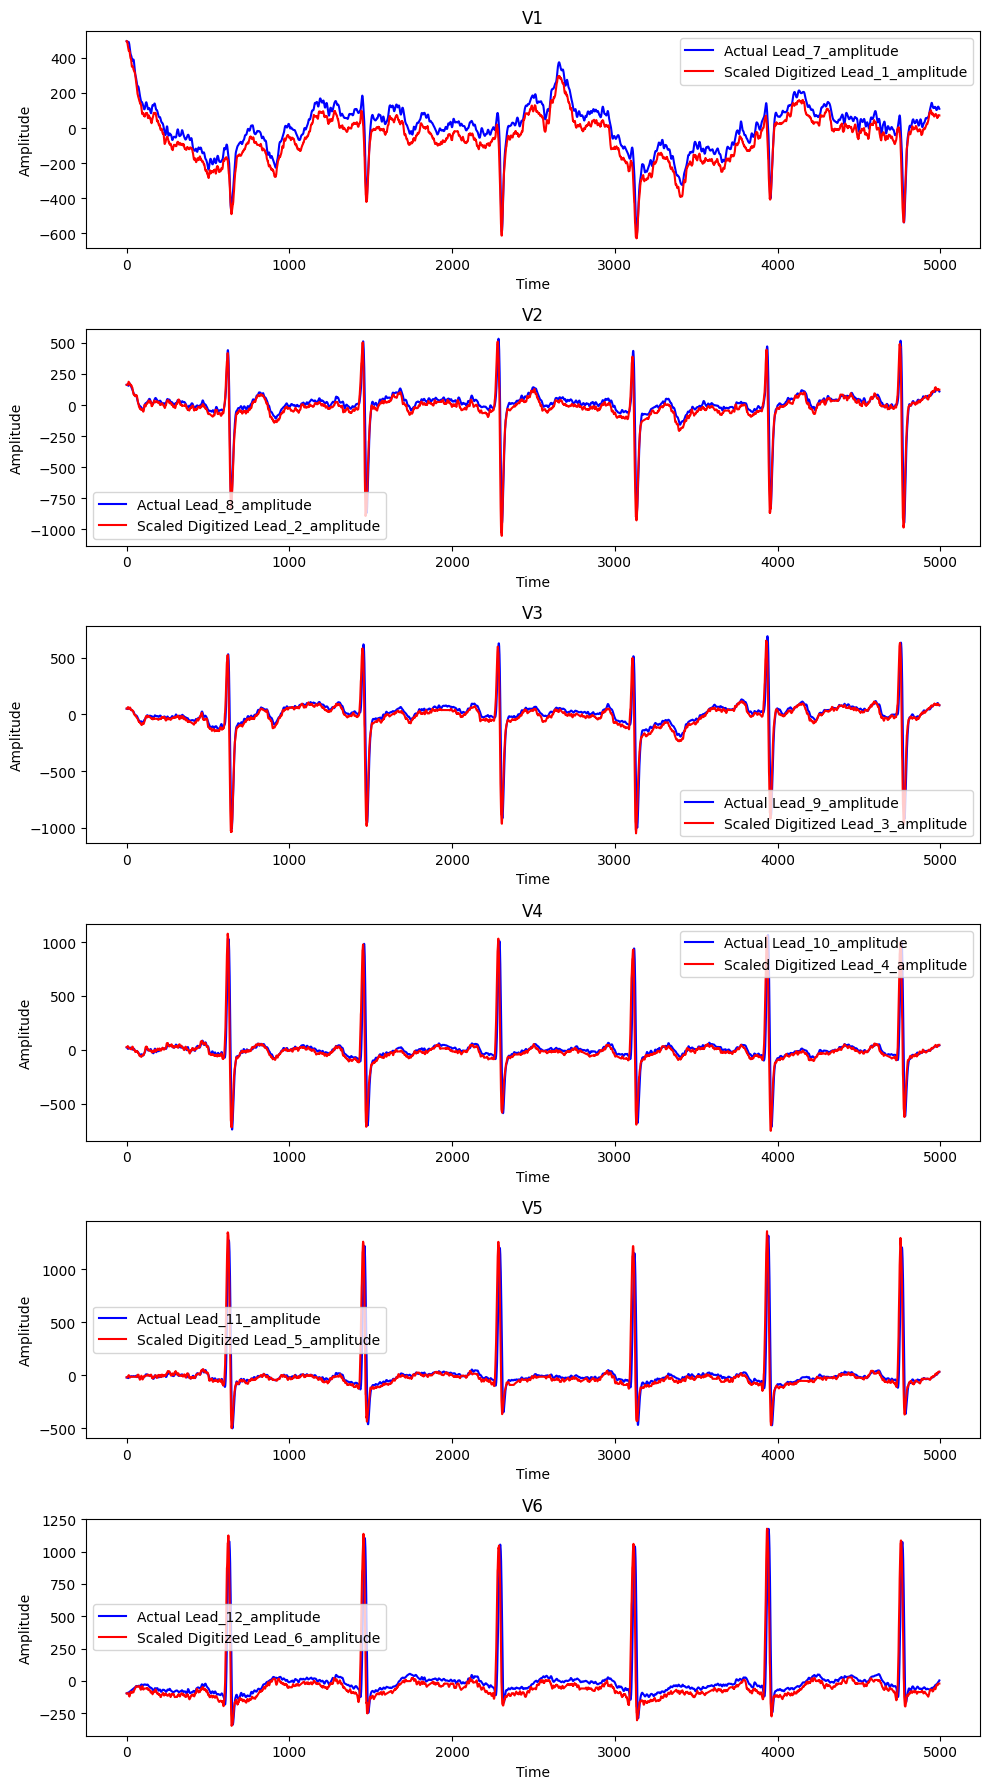

Digitized


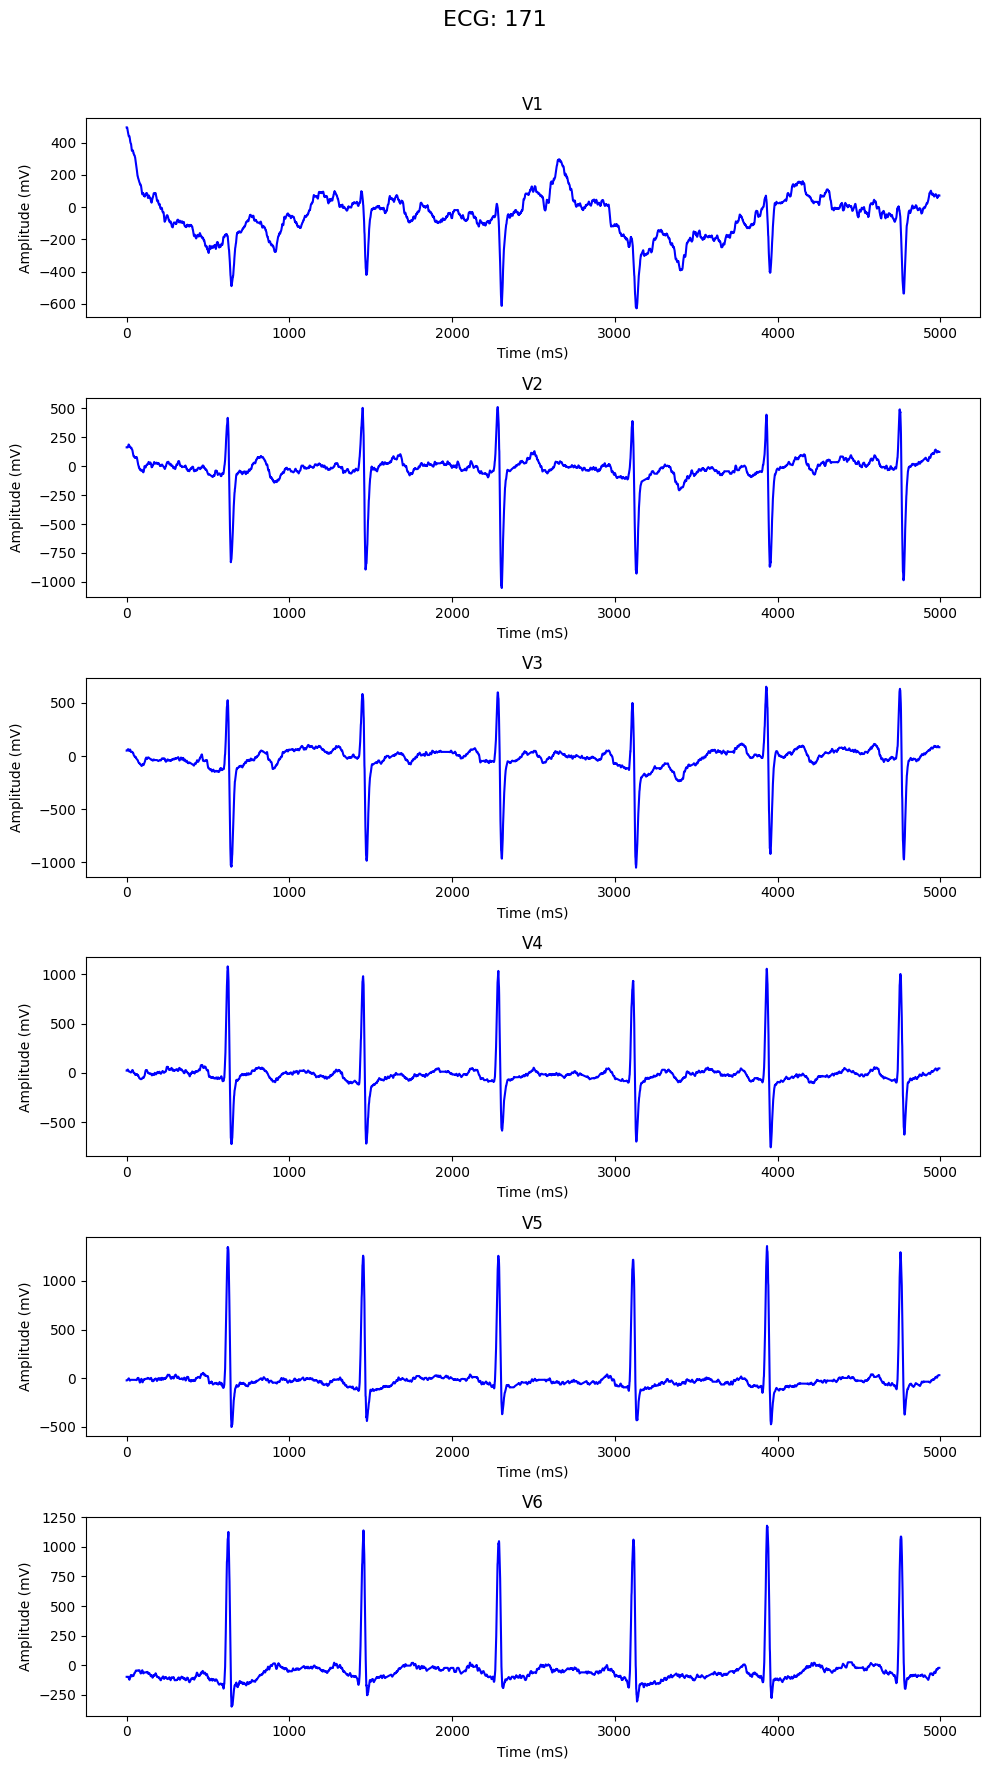

Actual


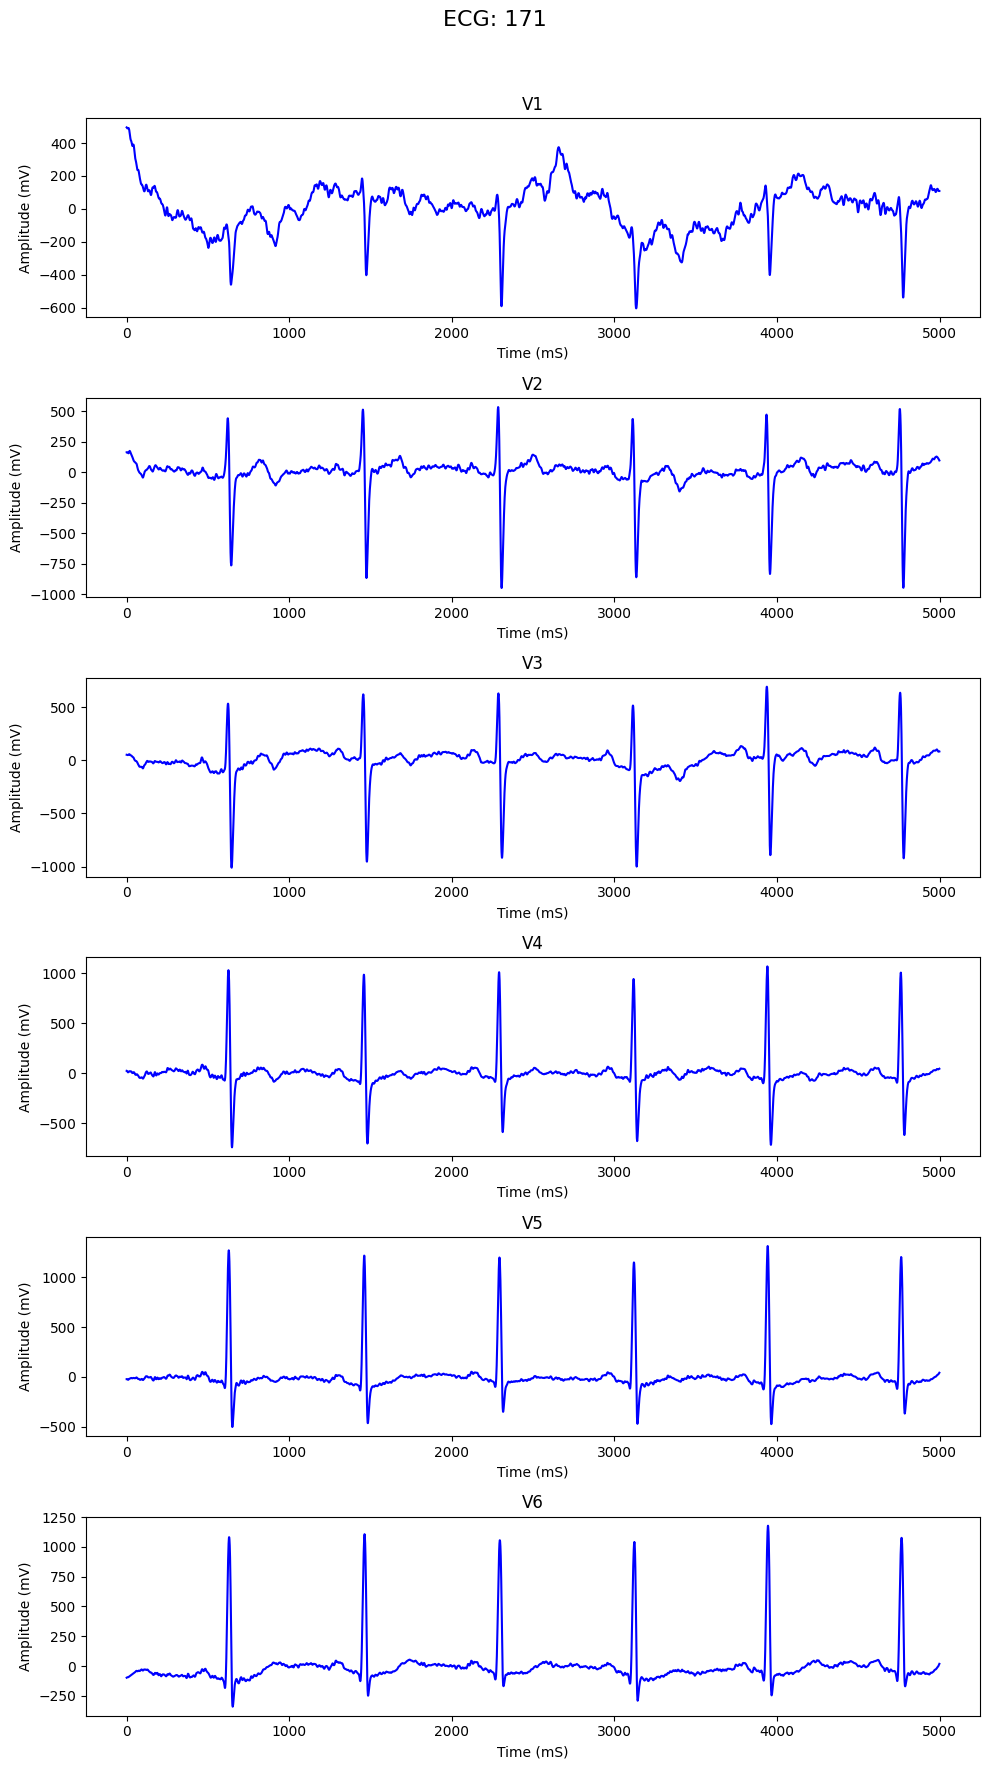

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import re

# File paths
digitized_file_path = r"D:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\Jo Orig V8\digitized_coordinates\171_F_page_2.csv"  # Path to your digitized data file
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120225.390380.csv"  # Path to your actual data file For 111 page 1
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120318.802568.csv"  # Path to your actual data file For 172 page 1
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120327.583812.csv"  # Path to your actual data file For 182 page 1
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120307.255307.csv"  # Path to your actual data file For 159 page 1
actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120317.871143.csv"  # Path to your actual data file For 171 page 1
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120301.739962.csv"  # Path to your actual data file For 153 page 1
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120306.333710.csv"  # Path to your actual data file For 158 page 1
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120212.932599.csv"  # Path to your actual data file For 97 page 1
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120303.580769.csv"  # Path to your actual data file For 155 page 1
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet_new\20230427-120233.548460.csv"  # Path to your actual data file For 120 page 1

# Load the data
digitized_df = pd.read_csv(digitized_file_path)
actual_df = pd.read_csv(actual_file_path)

# Use regular expression to extract the page number
match = re.search(r'_page_(\d+)', digitized_file_path)

if match:
    page_number = int(match.group(1))
    print("Page number:", page_number)
else:
    print("Page number not found in file path.")


# Extract ID and page number using regex
match = re.search(r"(\d+)_F_page_(\d+)\.csv", digitized_file_path)
if match:
    file_id = match.group(1)  # Extracts the ID
    print(f"ID: {file_id}, Page Number: {page_number}")
else:
    print("ID and page number not found in the file path.")

# Leads to validate
leads_to_validate = [f'Lead_{i}_amplitude' for i in range(1, 7)]  # Lead_1 to Lead_6

# Smooth the digitized data with a moving average
def smooth_leads_with_moving_average(digitized_df, window_size=5):
    """Apply moving average smoothing to the digitized leads data."""
    digitized_df_smoothed = digitized_df.copy()
    for lead in digitized_df.columns:
        digitized_df_smoothed[lead] = digitized_df[lead].rolling(window=window_size, center=True).mean()
    return digitized_df_smoothed

digitized_df_smoothed = smooth_leads_with_moving_average(digitized_df, window_size=7)
digitized_df_smoothed = digitized_df_smoothed.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')

# Define lead mappings for both pages
if page_number == 1:
    lead_mapping = {
        'Lead_1_amplitude': 'Lead_5_amplitude',
        'Lead_2_amplitude': 'Lead_1_amplitude',
        # 'Lead_3_amplitude': 'Lead_2_amplitude',
        # 'Lead_4_amplitude': ('Lead_4_amplitude', True),
        'Lead_3_amplitude': ('Lead_4_amplitude', True),  # Flip Lead_4 of actual_df
        'Lead_4_amplitude': 'Lead_2_amplitude',
        'Lead_5_amplitude': 'Lead_6_amplitude',
        'Lead_6_amplitude': 'Lead_3_amplitude'
    }
else:
    lead_mapping = {
        'Lead_1_amplitude': 'Lead_7_amplitude',
        'Lead_2_amplitude': 'Lead_8_amplitude',
        'Lead_3_amplitude': 'Lead_9_amplitude',
        'Lead_4_amplitude': 'Lead_10_amplitude',
        'Lead_5_amplitude': 'Lead_11_amplitude',
        'Lead_6_amplitude': 'Lead_12_amplitude'
    }

# Min-max scaling based on lead mappings
def apply_min_max_scaling(digitized_df, actual_df, lead_mapping):
    """
    Apply min-max scaling to the digitized data based on the actual data, following the lead mappings.
    """
    digitized_df_scaled = digitized_df.copy()

    for digitized_lead, actual_lead in lead_mapping.items():
        # Handle flipping if needed
        if isinstance(actual_lead, tuple):
            actual_lead, flip = actual_lead
        else:
            flip = False

        # Ensure both leads exist in the DataFrames
        if digitized_lead not in digitized_df.columns or actual_lead not in actual_df.columns:
            print(f"Warning: Lead '{digitized_lead}' or '{actual_lead}' is missing.")
            continue

        # Get min/max values for scaling
        actual_min = actual_df[actual_lead].min()
        actual_max = actual_df[actual_lead].max()
        digitized_min = digitized_df[digitized_lead].min()
        digitized_max = digitized_df[digitized_lead].max()

        # Min-max scaling formula
        digitized_df_scaled[digitized_lead] = (digitized_df[digitized_lead] - digitized_min) / (digitized_max - digitized_min) * (actual_max - actual_min) + actual_min

        # # Apply flipping to actual data if needed
        # if flip:
        #     digitized_df_scaled[digitized_lead] = -digitized_df_scaled[digitized_lead]

    return digitized_df_scaled

digitized_df_scaled = apply_min_max_scaling(digitized_df_smoothed, actual_df, lead_mapping)

# Update the plotting function to include additional metrics
def plot_scaled_digitized_single_column(digitized_df_scaled, actual_df, lead_mapping, page_number):
    """
    Plots each mapped lead's time-amplitude for scaled digitized data in a single column layout 
    """
    num_leads = len(lead_mapping)
    plt.figure(figsize=(10, num_leads * 3))

    # Define titles based on page number
    titles = {
        1: ["aVL", "I", "-aVR", "II", "aVF", "III"],
        2: ["V1", "V2", "V3", "V4", "V5", "V6"]
    }
    lead_titles = titles.get(page_number, ["Lead"] * num_leads)

    # Plot each lead based on the mapping
    for i, (digitized_lead, actual_lead) in enumerate(lead_mapping.items()):
        if isinstance(actual_lead, tuple):
            actual_lead, flip = actual_lead
        else:
            flip = False

        if digitized_lead not in digitized_df_scaled.columns or actual_lead not in actual_df.columns:
            print(f"Skipping lead comparison: {digitized_lead} vs {actual_lead} as one is missing in the DataFrame")
            continue

        # Align lengths by truncating
        length = min(len(actual_df[actual_lead]), len(digitized_df_scaled[digitized_lead]))
        y_actual = actual_df[actual_lead].iloc[:length]
        y_digitized = digitized_df_scaled[digitized_lead].iloc[:length]

        # Flip actual lead if specified
        if flip:
            y_actual = -y_actual

        # Invert the digitized values
        y_digitized = -y_digitized

        # Calculate the shift to align the digitized values with the actual values
        shift_amount = y_actual.iloc[0] - y_digitized.iloc[0]
        y_digitized += shift_amount  # Shift the digitized values

        # Plotting
        plt.subplot(num_leads, 1, i + 1)
        plt.plot(y_actual, label=f'Actual {actual_lead}', color='blue')
        plt.plot(y_digitized, label=f'Scaled Digitized {digitized_lead}', color='red')
        plt.title(f'{lead_titles[i]}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()

    plt.tight_layout()
    plt.show()
    print("Digitized")
    # Additional Plot 1: Only Digitized Leads
    plt.figure(figsize=(10, num_leads * 3))
    # Add the file_id as the main title of the plot
    plt.suptitle(f"ECG: {file_id}", fontsize=16)

    for i, (digitized_lead, actual_lead) in enumerate(lead_mapping.items()):
        if isinstance(actual_lead, tuple):
            actual_lead, flip = actual_lead
        else:
            flip = False

        if digitized_lead not in digitized_df_scaled.columns or actual_lead not in actual_df.columns:
            print(f"Skipping lead comparison: {digitized_lead} vs {actual_lead} as one is missing in the DataFrame")
            continue

        # Limit both digitized and actual data to the first 5000 points for alignment
        y_digitized = -digitized_df_scaled[digitized_lead].iloc[:5000]
        y_actual = actual_df[actual_lead].iloc[:5000]
        if flip:
            y_actual = -y_actual

        # Calculate the shift to align digitized with actual values at the start point
        shift_amount = y_actual.iloc[0] - y_digitized.iloc[0]
        y_digitized += shift_amount  # Apply shift to digitized values

        plt.subplot(num_leads, 1, i + 1)
        plt.plot(y_digitized, color='blue')
        plt.title(f'{lead_titles[i]}')
        plt.xlabel('Time (mS)')
        plt.ylabel('Amplitude (mV)')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    print("Actual")
    # Additional Plot 2: Only Actual Leads
    plt.figure(figsize=(10, num_leads * 3))
    plt.suptitle(f"ECG: {file_id}", fontsize=16)

    for i, actual_lead in enumerate(lead_mapping.values()):
        if isinstance(actual_lead, tuple):
            actual_lead, flip = actual_lead
        else:
            flip = False

        if actual_lead not in actual_df.columns:
            print(f"Skipping lead: {actual_lead} as it is missing in the DataFrame")
            continue

        # Limit the actual data to the first 5000 points
        y_actual = actual_df[actual_lead].iloc[:5000]
        if flip:
            y_actual = -y_actual

        plt.subplot(num_leads, 1, i + 1)
        plt.plot(y_actual, color='blue')
        plt.title(f'{lead_titles[i]}')
        plt.xlabel('Time (mS)')
        plt.ylabel('Amplitude (mV)')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Call the updated function
plot_scaled_digitized_single_column(digitized_df_scaled, actual_df, lead_mapping, page_number)

